In [14]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

In [15]:
# figure settings
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200, facecolor="white")
sc.set_figure_params(figsize=(5, 5))

In [16]:
# Read in
atlas = sc.read("R_Projects/scAtlas/Analysis/BigObj/Objects/Atlas_adata_all_sublabels.h5ad")
atlas

AnnData object with n_obs × n_vars = 329774 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

In [17]:
# Store the counts for later use
atlas.layers["counts"] = atlas.X.copy()

In [18]:
atlas

AnnData object with n_obs × n_vars = 329774 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

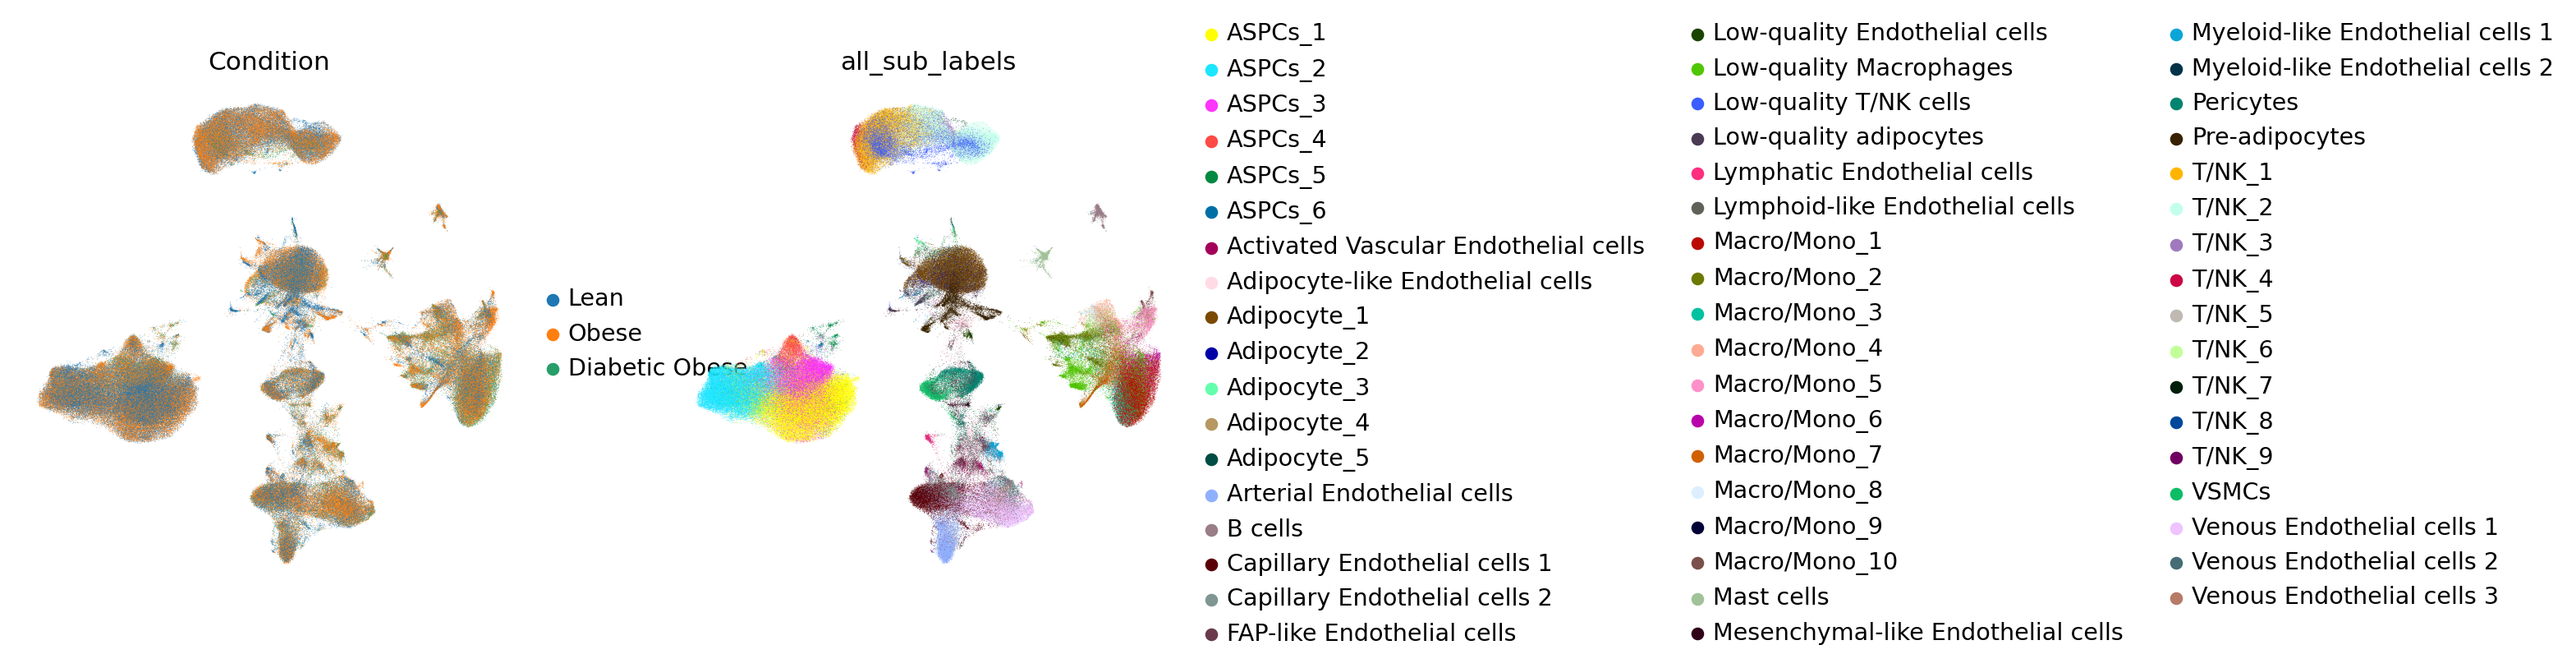

In [19]:
sc.pl.umap(atlas, 
           color=["Condition", "all_sub_labels"], 
           frameon=False)

## Removing low-quality cells

In [20]:
low_quality_labels = [
    'Low-quality Endothelial cells', 
    'Low-quality Macrophages', 
    'Low-quality adipocytes', 
    'Low-quality T/NK cells'
]

atlas = atlas[~atlas.obs['all_sub_labels'].isin(low_quality_labels)].copy()

In [21]:
atlas

AnnData object with n_obs × n_vars = 302329 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

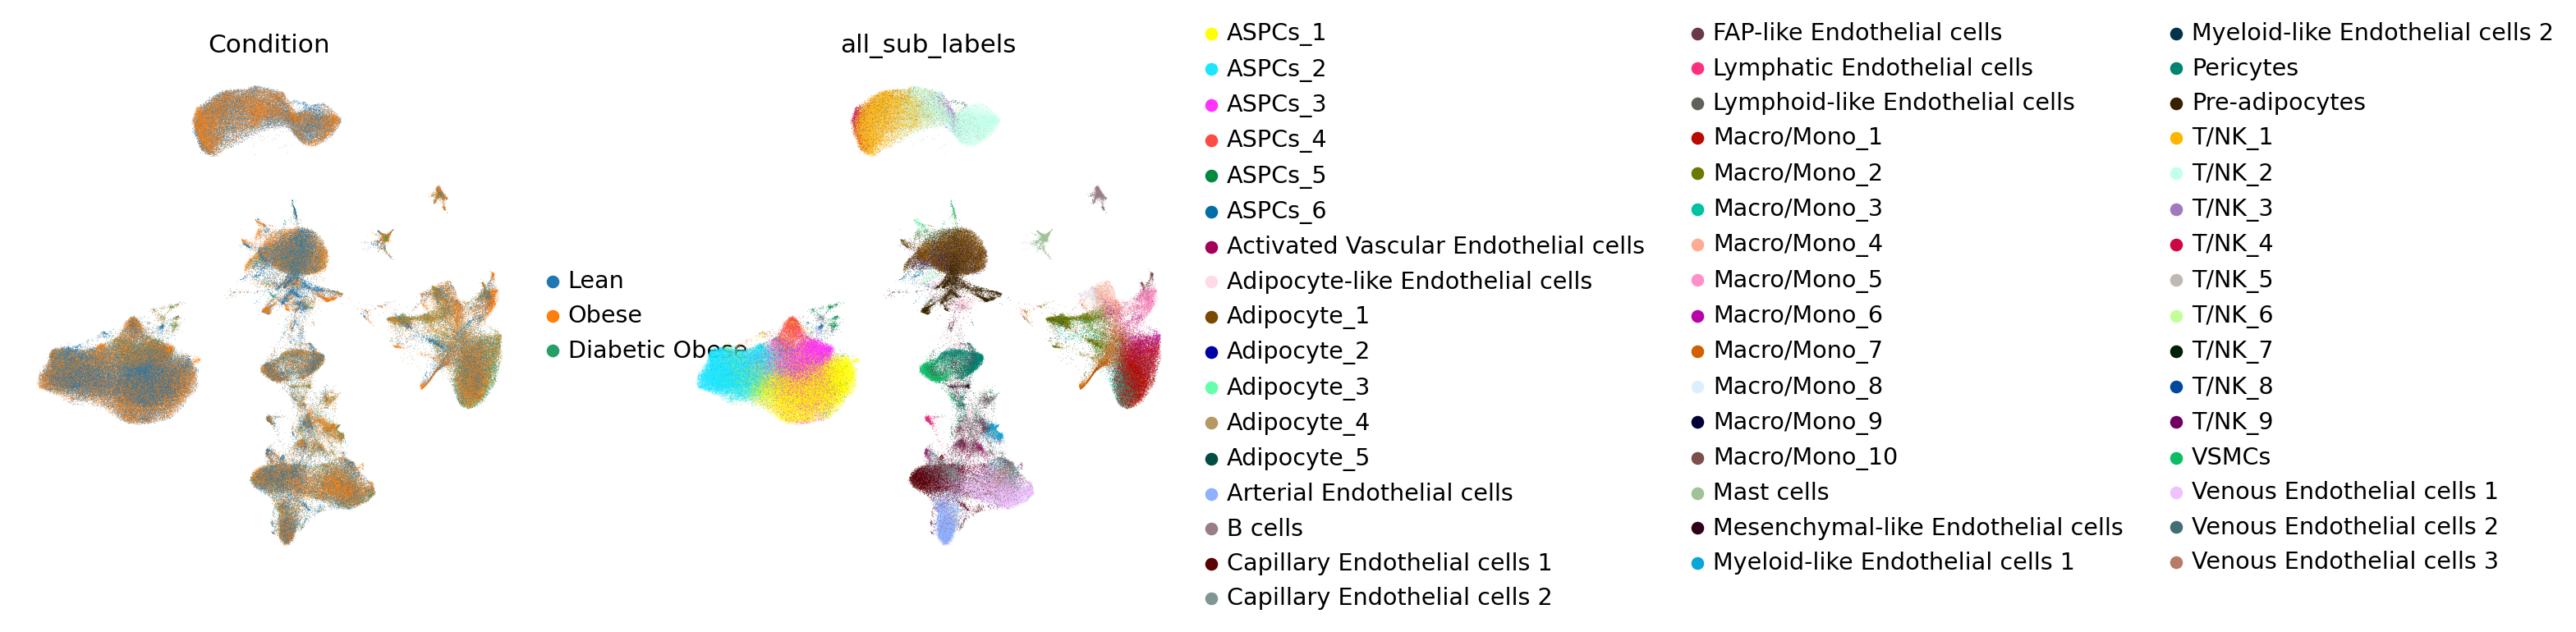

In [22]:
sc.pl.umap(atlas, 
           color=["Condition", "all_sub_labels"], 
           frameon=False)

In [23]:
atlas_lean = atlas[atlas.obs["Condition"] == "Lean"].copy()
atlas_lean

AnnData object with n_obs × n_vars = 121208 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

In [24]:
sc.pp.normalize_total(atlas_lean, target_sum=10000)
sc.pp.log1p(atlas_lean)

In [25]:
atlas_lean

AnnData object with n_obs × n_vars = 121208 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

In [26]:
# import cellphonedb method via liana
from liana.method import cellphonedb

In [27]:
cellphonedb(
    atlas_lean, groupby="all_sub_labels", 
    use_raw=False, return_all_lrs=True, verbose=True
)

Using `.X`!


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


Converting mat to CSR format
3066 features of mat are empty, they will be removed.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.05 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 121208 samples and 44306 features


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [28]:
atlas_lean

AnnData object with n_obs × n_vars = 121208 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

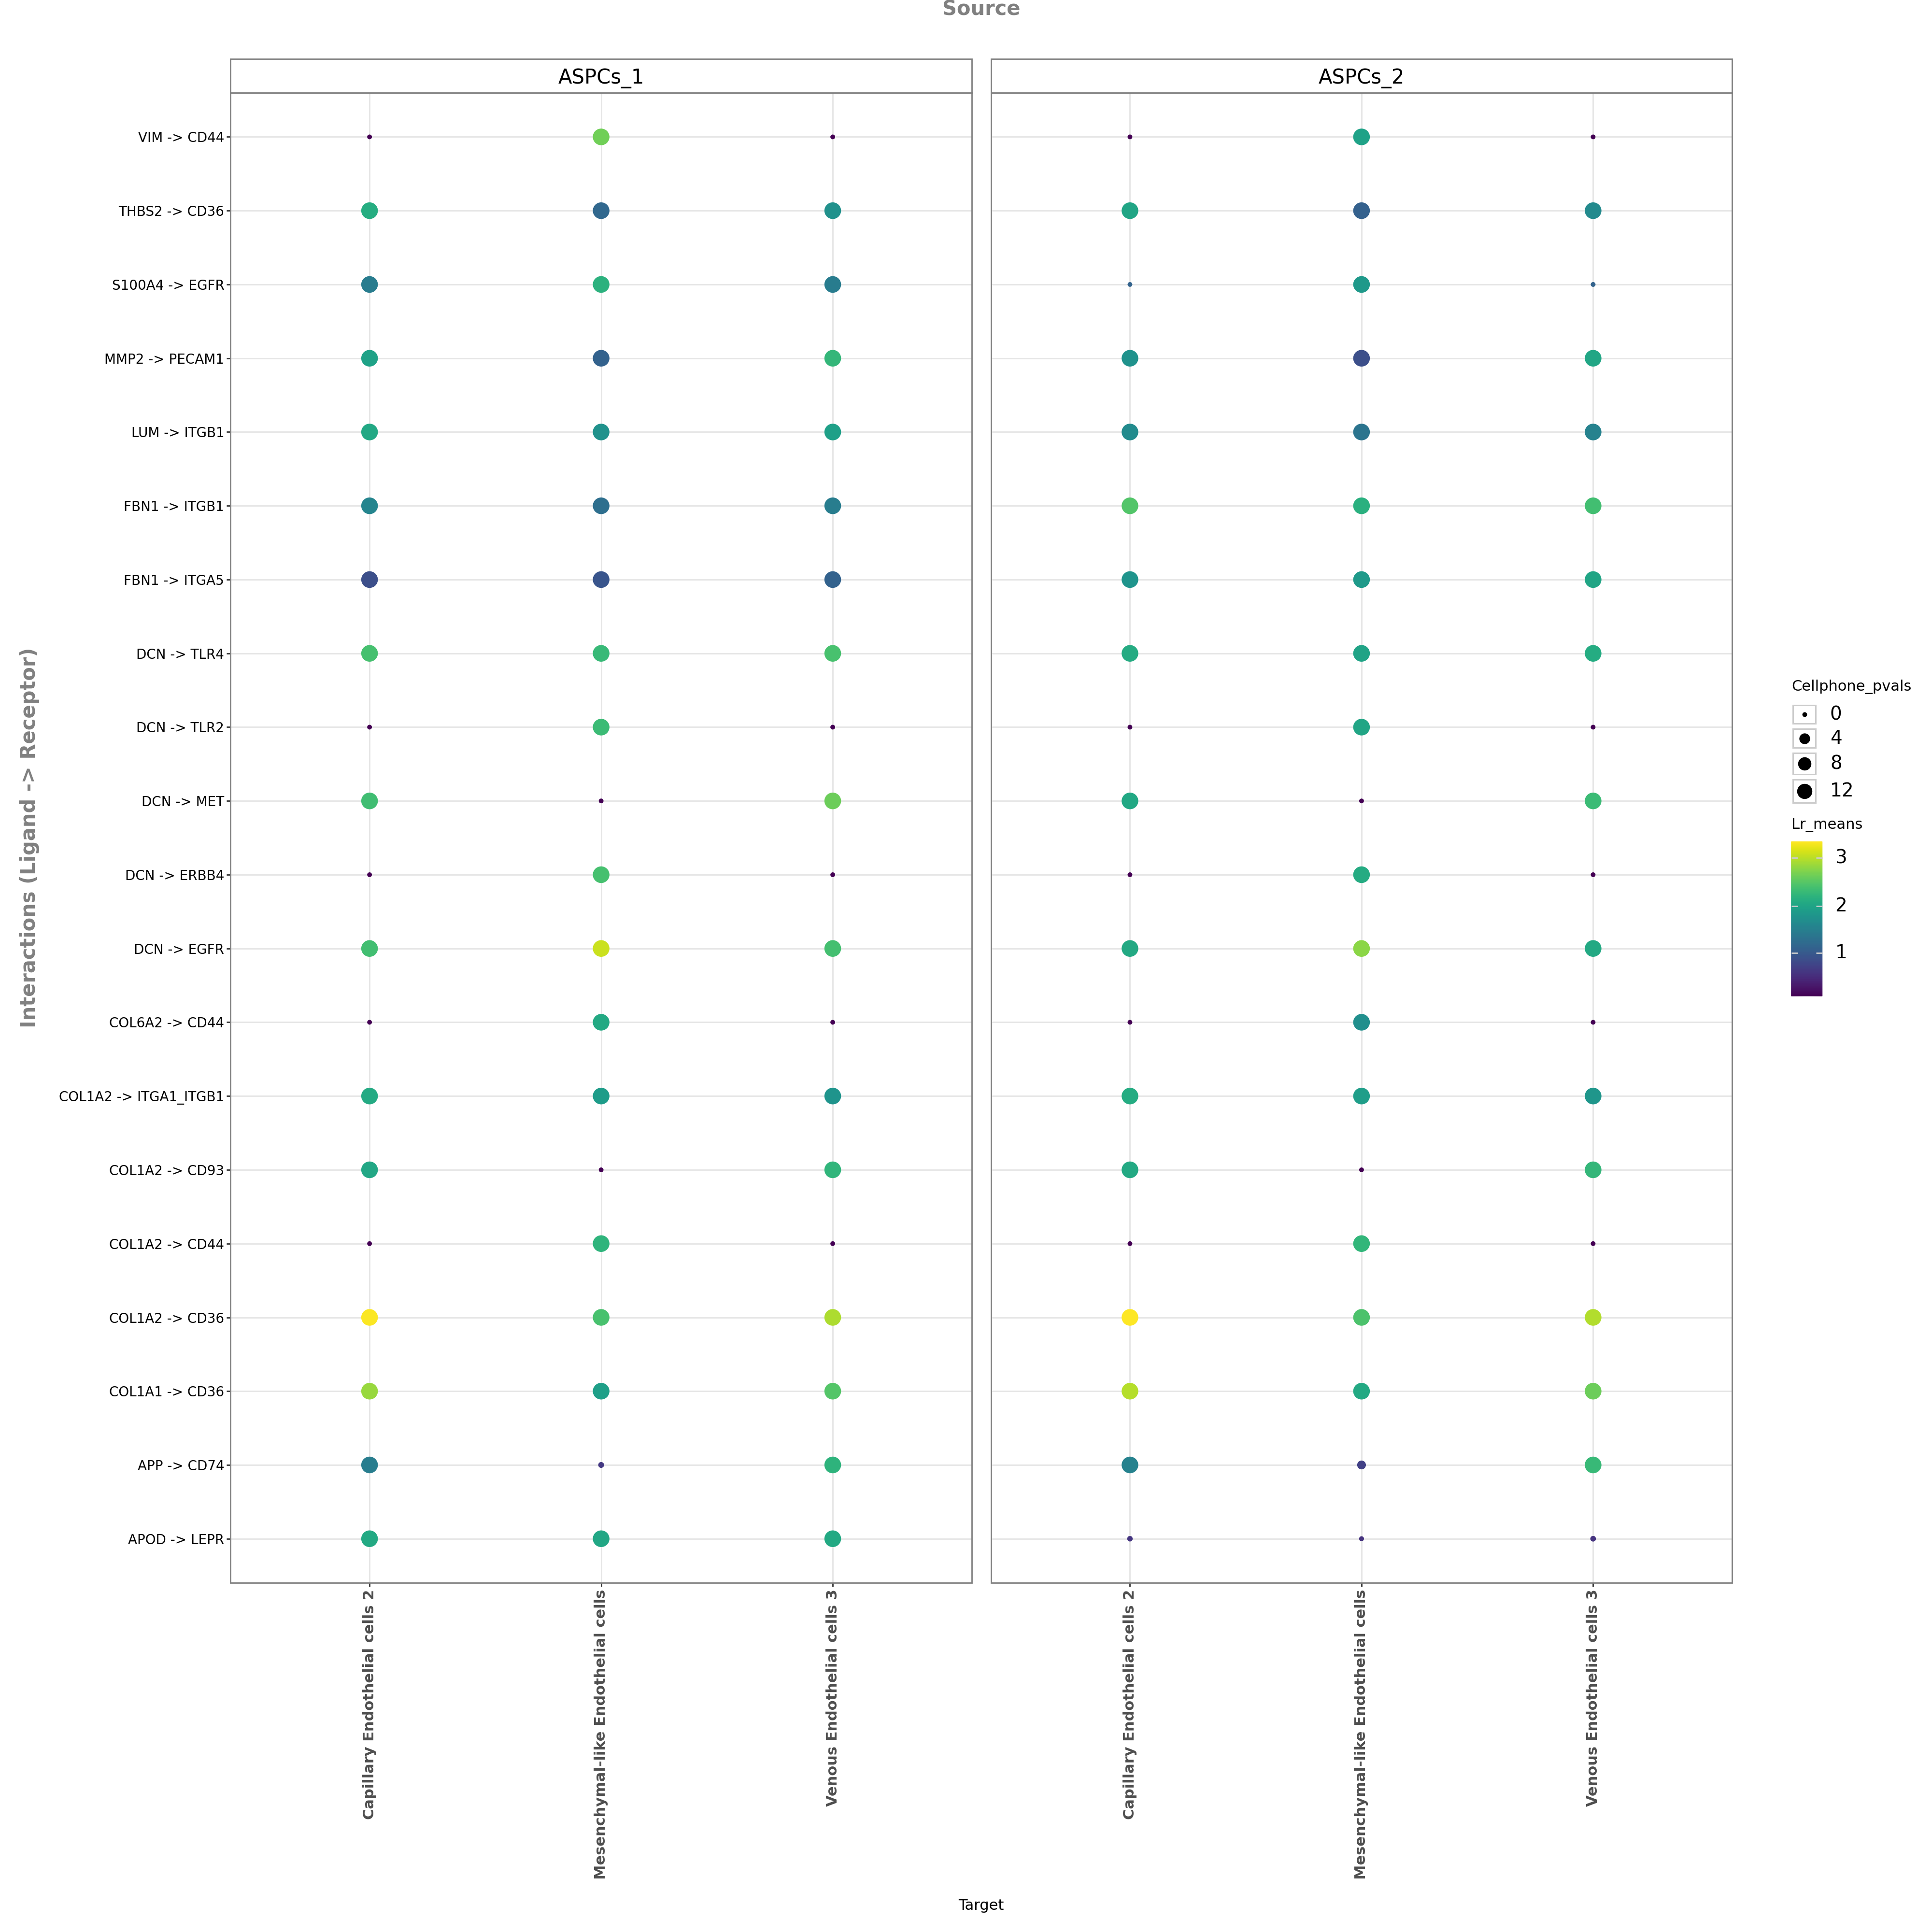

In [29]:
li.pl.dotplot(
    adata=atlas_lean,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["ASPCs_1", "ASPCs_2"],
    target_labels=["Mesenchymal-like Endothelial cells", "Capillary Endothelial cells 2", "Venous Endothelial cells 3"],
    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    # filterby="cellphone_pvals",
    # filter_lambda=lambda x: x <= 0.01,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(20, 20),
    size_range=(1, 6),
)

In [30]:
# import liana's rank_aggregate
from liana.mt import rank_aggregate

In [ ]:
li.method.show_methods()

In [31]:
atlas_lean.uns["liana_res"].drop_duplicates(
    ["ligand_complex", "receptor_complex"]
).head()

ligand ligand_complex  ligand_means  ligand_props receptor  \
9128365     B2M            B2M      5.494173      1.000000    KLRD1   
9128358     B2M            B2M      5.494173      1.000000     CD3G   
9610673  CXCL14         CXCL14      3.300364      0.817821    CXCR4   
9128356     B2M            B2M      5.494173      1.000000     CD3D   
6070864     B2M            B2M      5.494173      1.000000   LILRB2   

        receptor_complex  receptor_means  receptor_props   source  \
9128365            KLRD1        2.870357        0.961538   T/NK_4   
9128358             CD3G        2.134275        0.846154   T/NK_4   
9610673            CXCR4        4.289173        1.000000  ASPCs_1   
9128356             CD3D        2.053988        0.833333   T/NK_4   
6070864           LILRB2        1.700951        0.762887   T/NK_4   

               target  lrs_to_keep  lr_means  cellphone_pvals  
9128365        T/NK_6         True  4.182265              0.0  
9128358        T/NK_6         True  3.814224              0.0  
9610673        T/NK_9         True  3.794769              0.0  
9128356        T/NK_6         True  3.774081              0.0  
6070864  Macro/Mono_8         True  3.597562              0.0

In [32]:
# Run rank_aggregate
li.mt.rank_aggregate(atlas_lean, use_raw=False,
                     groupby='all_sub_labels',
                     resource_name='consensus',
                     expr_prop=0.1,
                     verbose=True)

Using `.X`!


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


Converting mat to CSR format
3066 features of mat are empty, they will be removed.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.05 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 121208 samples and 44306 features


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_liana_pipe.py:312: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████| 1000/1000 [02:56<00:00,  5.68it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|█████████████████████████████████████| 1000/1000 [1:00:39<00:00,  3.64s/it]


In [35]:
liana_res = atlas_lean.uns['liana_res'].copy()
liana_res.to_csv('atlas_lean_aggregate_scores.csv')
# only keep those that are not liana's ranks
liana_res.head()

source  target ligand_complex receptor_complex  lr_means  \
446162  T/NK_4  T/NK_6            B2M            KLRD1  4.182265   
467217  T/NK_8  T/NK_6            B2M            KLRD1  4.179282   
456952  T/NK_6  T/NK_6            B2M            KLRD1  4.163982   
435544  T/NK_2  T/NK_6            B2M            KLRD1  4.098057   
429947  T/NK_1  T/NK_6            B2M            KLRD1  4.106211   

        cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
446162              0.0  15.770236       2.406917  2.688071     0.010789   
467217              0.0  15.753115       2.405421  2.649219     0.010778   
456952              0.0  15.665283       2.397746  2.631971     0.010717   
435544              0.0  15.286820       2.364670  2.769500     0.010459   
429947              0.0  15.333630       2.368764  2.797326     0.010491   

         lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
446162  0.985896  0.346422             0.0          0.000213    4.187981e-16  
467217  0.985889  0.343960             0.0          0.000215    3.350377e-15  
456952  0.985850  0.343334             0.0          0.000222    1.130750e-14  
435544  0.985678  0.339267             0.0          0.000255    2.680290e-14  
429947  0.985700  0.339195             0.0          0.000250    5.234930e-14

In [36]:
atlas_lean.uns["liana_res"].sort_values("magnitude_rank").head(30)

source  target ligand_complex receptor_complex  \
446162                         T/NK_4  T/NK_6            B2M            KLRD1   
467217                         T/NK_8  T/NK_6            B2M            KLRD1   
456952                         T/NK_6  T/NK_6            B2M            KLRD1   
435544                         T/NK_2  T/NK_6            B2M            KLRD1   
429947                         T/NK_1  T/NK_6            B2M            KLRD1   
472101                         T/NK_9  T/NK_6            B2M            KLRD1   
462325                         T/NK_7  T/NK_6            B2M            KLRD1   
13385                         ASPCs_1  T/NK_9         CXCL14            CXCR4   
441171                         T/NK_3  T/NK_6            B2M            KLRD1   
451474                         T/NK_5  T/NK_6            B2M            KLRD1   
13254                         ASPCs_1  T/NK_8         CXCL14            CXCR4   
12197                         ASPCs_1  T/NK_1         CXCL14            CXCR4   
446160                         T/NK_4  T/NK_6            B2M             CD3G   
467215                         T/NK_8  T/NK_6            B2M             CD3G   
456950                         T/NK_6  T/NK_6            B2M             CD3G   
456984                         T/NK_6  T/NK_6          HLA-B            KLRD1   
12500                         ASPCs_1  T/NK_3         CXCL14            CXCR4   
211569  Capillary Endothelial cells 2  T/NK_6            B2M            KLRD1   
435542                         T/NK_2  T/NK_6            B2M             CD3G   
429945                         T/NK_1  T/NK_6            B2M             CD3G   
446159                         T/NK_4  T/NK_6            B2M             CD3D   
472099                         T/NK_9  T/NK_6            B2M             CD3G   
515209     Venous Endothelial cells 3  T/NK_6            B2M            KLRD1   
467249                         T/NK_8  T/NK_6          HLA-B            KLRD1   
467214                         T/NK_8  T/NK_6            B2M             CD3D   
456949                         T/NK_6  T/NK_6            B2M             CD3D   
457239                         T/NK_6  T/NK_9          HMGB1            CXCR4   
12945                         ASPCs_1  T/NK_6         CXCL14            CXCR4   
435576                         T/NK_2  T/NK_6          HLA-B            KLRD1   
462323                         T/NK_7  T/NK_6            B2M             CD3G   

        lr_means  cellphone_pvals  expr_prod  scaled_weight  lr_logfc  \
446162  4.182265              0.0  15.770236       2.406917  2.688071   
467217  4.179282              0.0  15.753115       2.405421  2.649219   
456952  4.163982              0.0  15.665283       2.397746  2.631971   
435544  4.098057              0.0  15.286820       2.364670  2.769500   
429947  4.106211              0.0  15.333630       2.368764  2.797326   
472101  4.099351              0.0  15.294250       2.365320  2.551697   
462325  4.025241              0.0  14.868808       2.328141  2.474714   
13385   3.794769              0.0  14.155835       1.856474  3.072160   
441171  4.029861              0.0  14.895329       2.330458  2.473462   
451474  3.918485              0.0  14.255951       2.274581  2.427069   
13254   3.700376              0.0  13.532774       1.797094  2.984535   
12197   3.676543              0.0  13.375460       1.782101  3.362336   
446160  3.814224              0.0  11.726079       2.241780  2.490938   
467215  3.811242              0.0  11.713348       2.240284  2.452086   
456950  3.795942              0.0  11.648040       2.232609  2.434839   
456984  3.564733              0.0  12.225164       2.522563  2.708892   
12500   3.536271              0.0  12.449559       1.693856  2.816791   
211569  3.514441              0.0  11.936452       2.071877  2.009397   
435542  3.730016              0.0  11.366632       2.199532  2.572368   
429945  3.738170              0.0  11.401437       2.203626

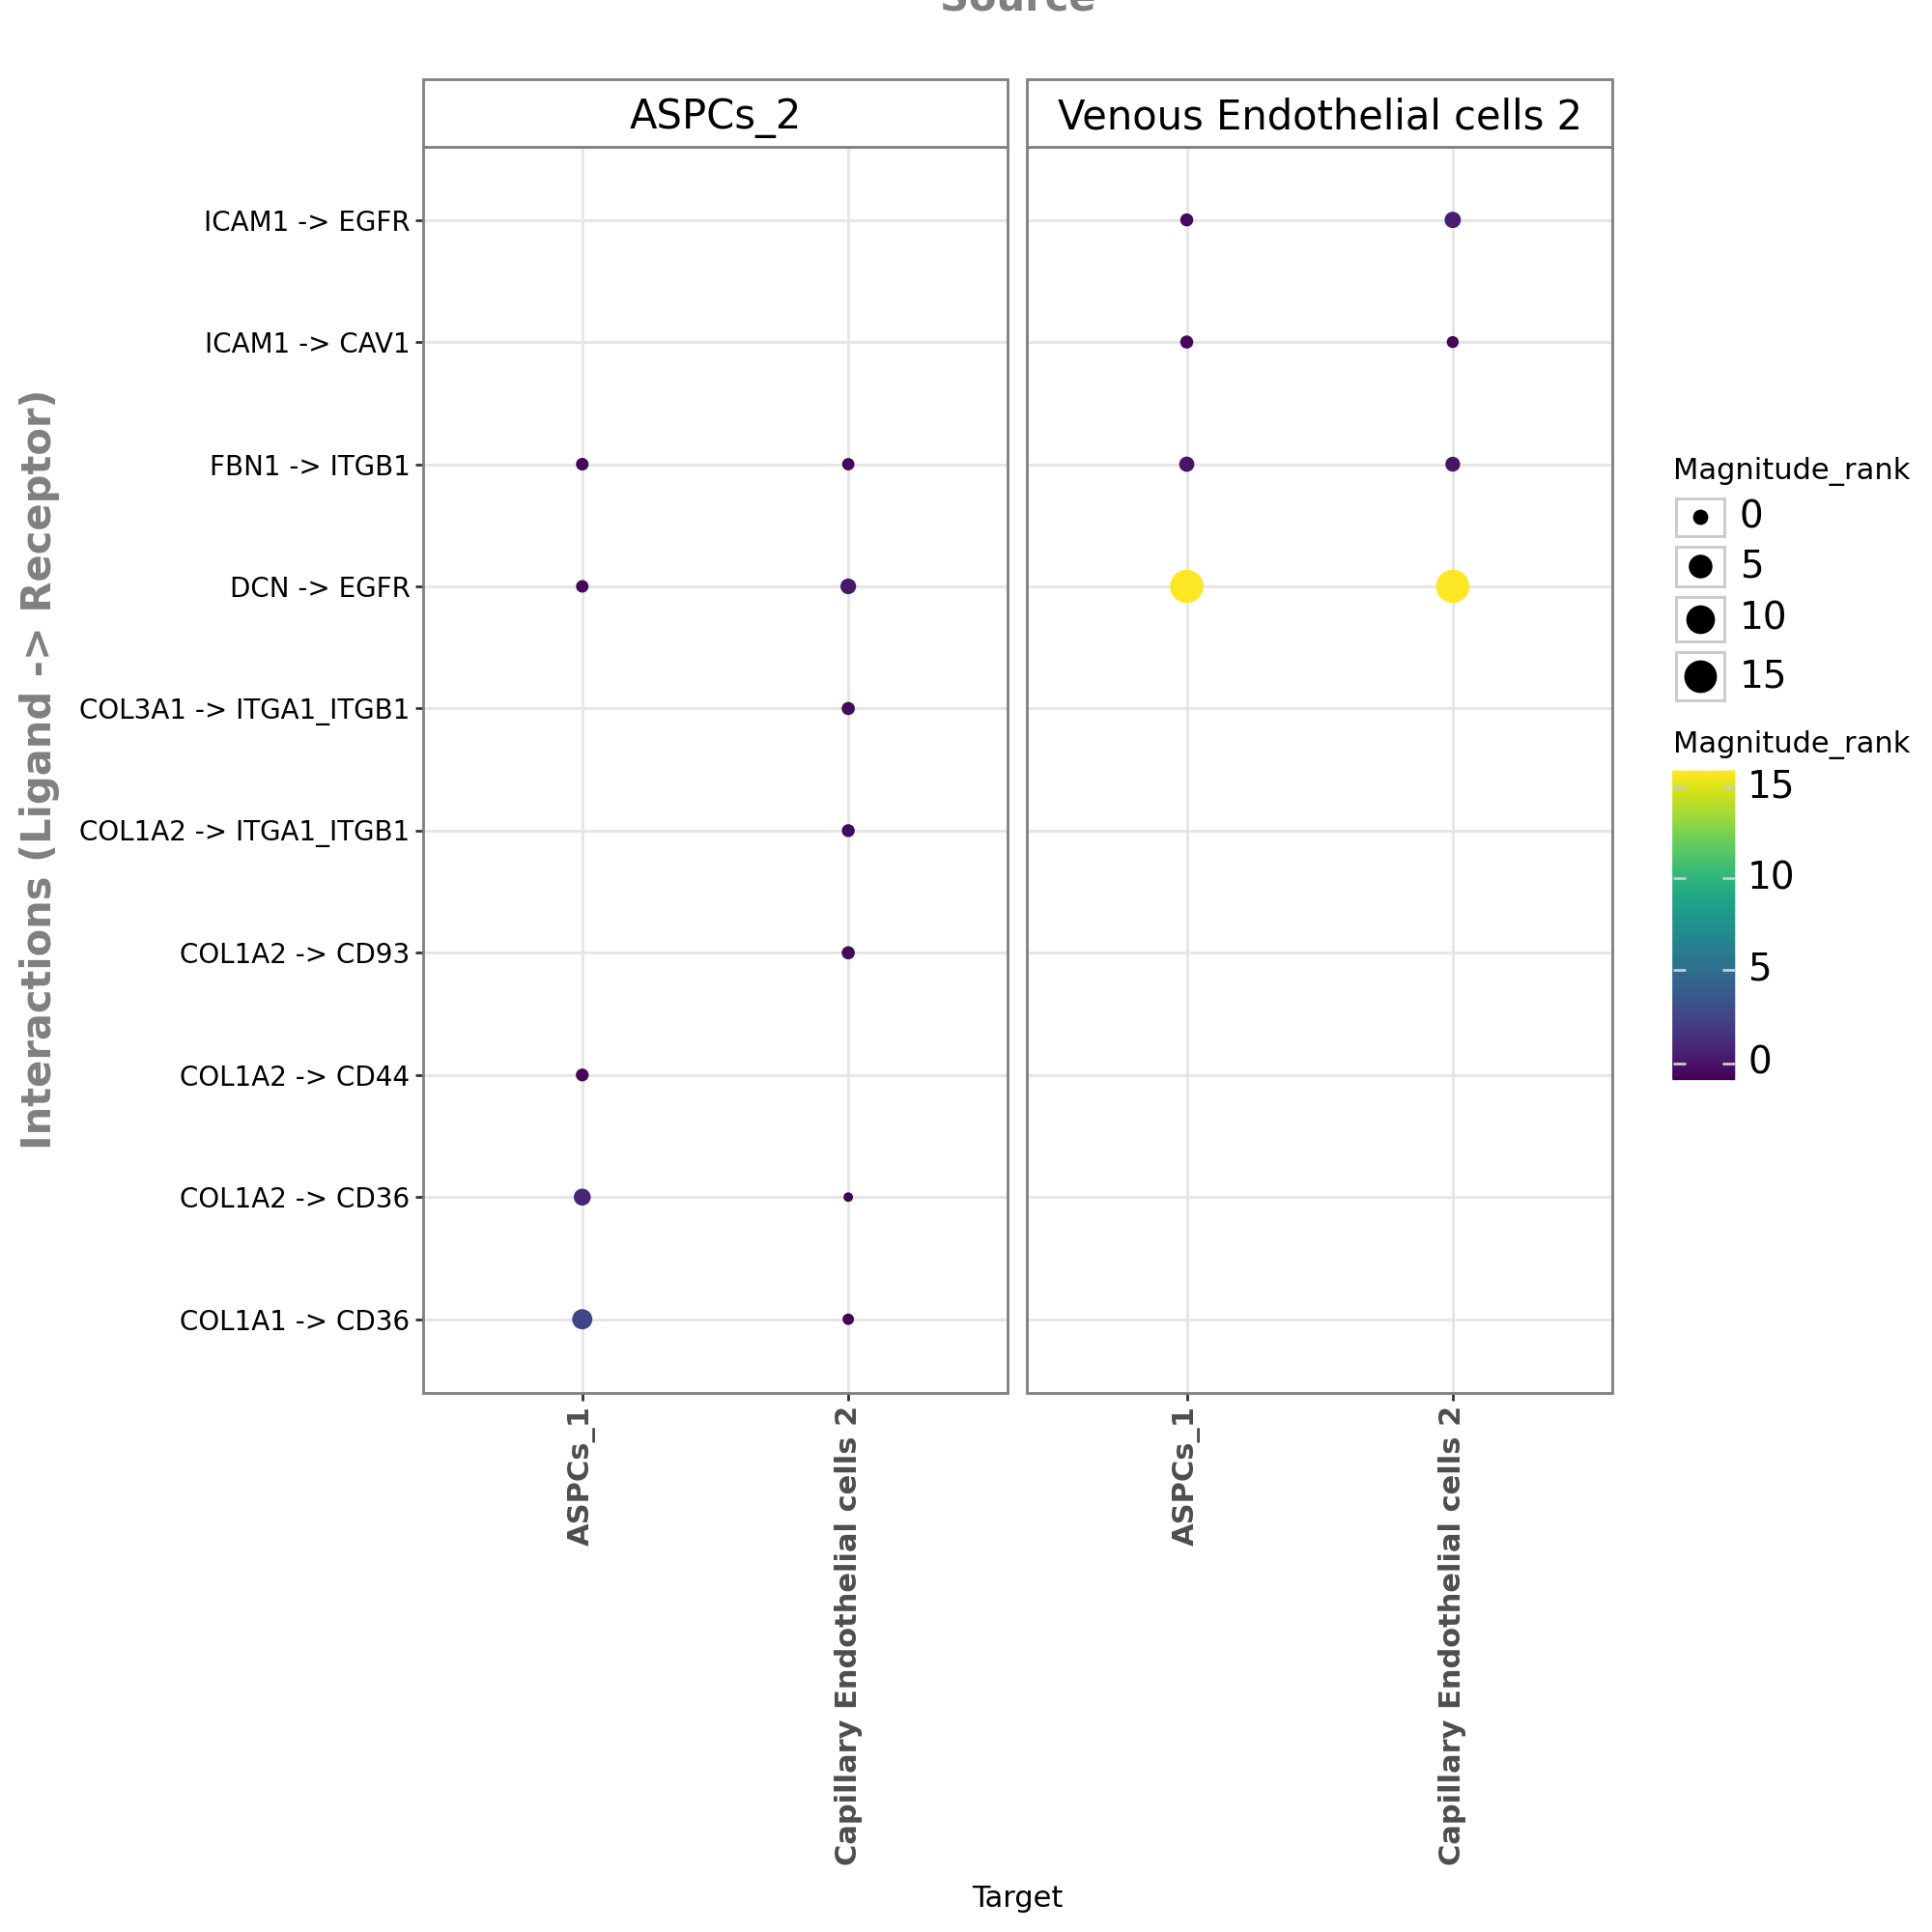

In [39]:
li.pl.dotplot(
    adata=atlas_lean,
    colour="magnitude_rank",
    # size="specificity_rank",
    size="magnitude_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    source_labels=["Venous Endothelial cells 2", "ASPCs_2"],
    target_labels=["Capillary Endothelial cells 2", "ASPCs_1"],# since the rank_aggregate can also be interpreted as a probability distribution
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    # filterby="specificity_rank",
    # filter_lambda=lambda x: x <= 0.05,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=10,  # and we want to keep only the top 10 interactions
    figure_size=(10, 10),
    size_range=(1, 6),
)

In [40]:
atlas_lean.write_h5ad('atlas_lean_Liana_plus_ran.h5ad')

In [ ]:
pdata_lean.obs

## Obese

In [42]:
atlas_obese = atlas[atlas.obs["Condition"] == "Obese"].copy()
atlas_obese

AnnData object with n_obs × n_vars = 147443 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', '

In [43]:
sc.pp.normalize_total(atlas_obese, target_sum=10000)
sc.pp.log1p(atlas_obese)

In [44]:
cellphonedb(
    atlas_obese, groupby="all_sub_labels", use_raw=False, return_all_lrs=True, verbose=True
)

Using `.X`!


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


Converting mat to CSR format
5069 features of mat are empty, they will be removed.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.05 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 147443 samples and 42303 features


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

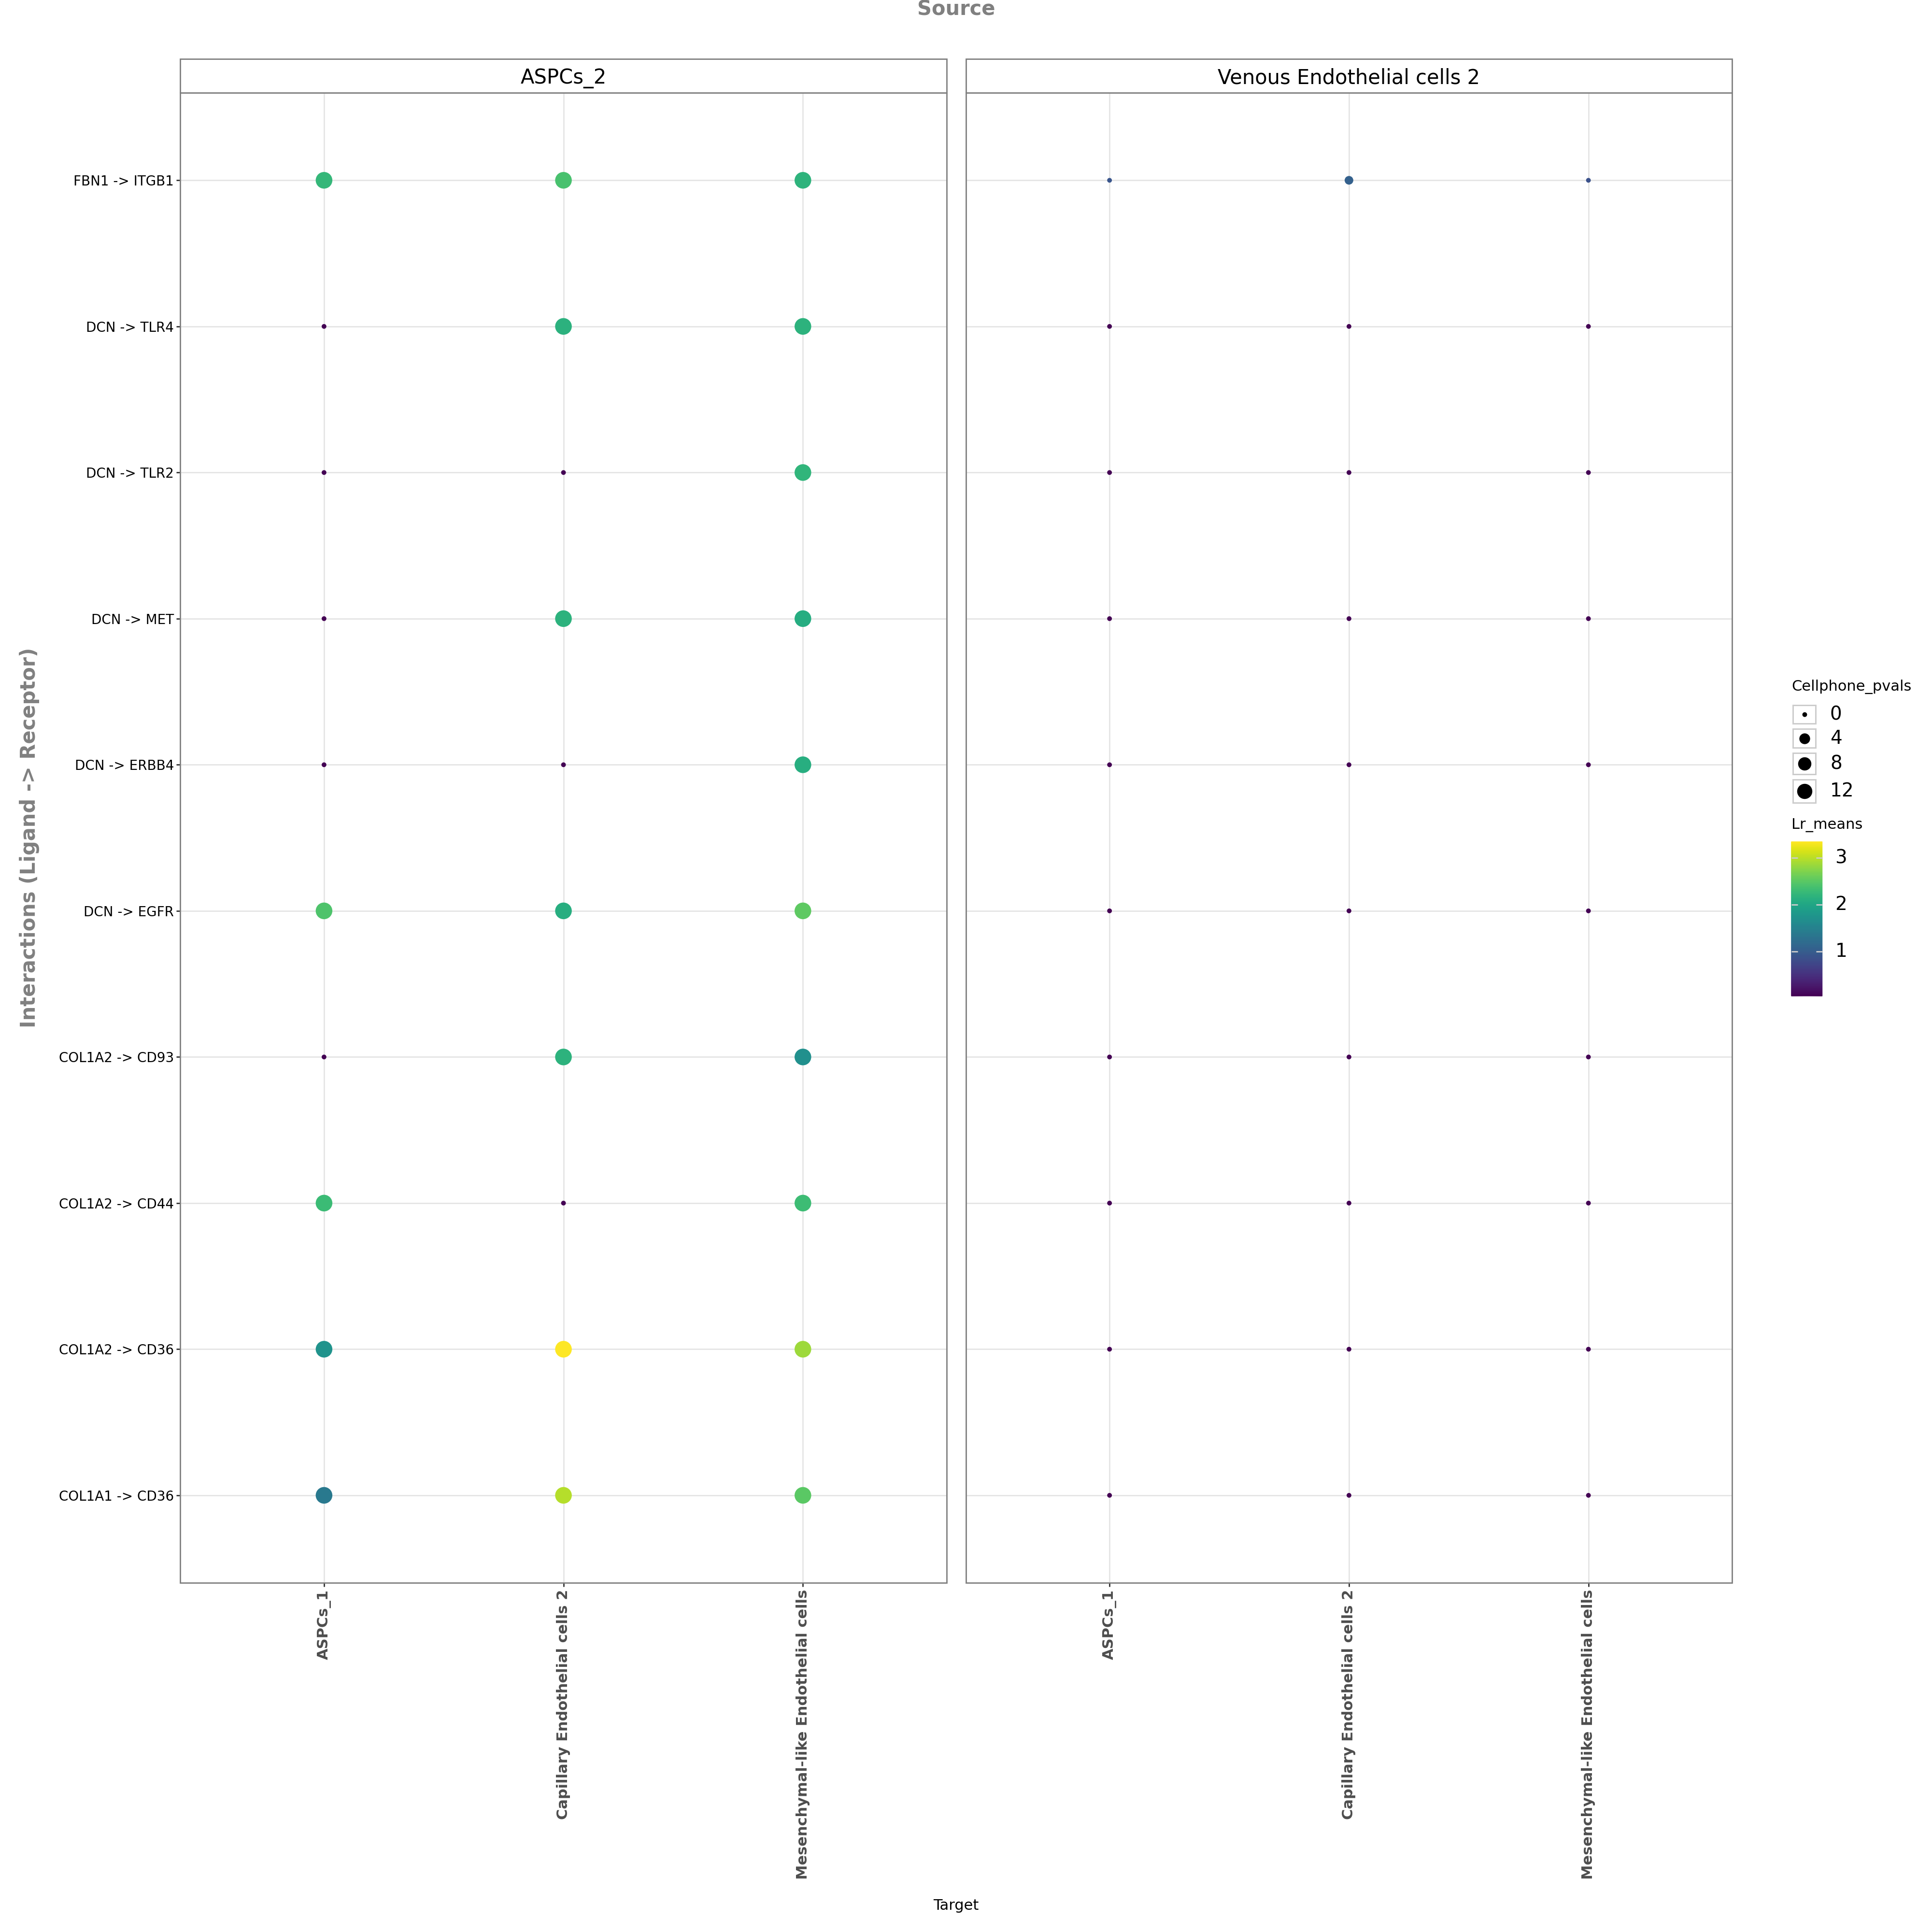

In [45]:
li.pl.dotplot(
    adata=atlas_obese,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["ASPCs_2", "Venous Endothelial cells 2"],
    target_labels=["Mesenchymal-like Endothelial cells", "Capillary Endothelial cells 2", "ASPCs_1"],
    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    # filterby="cellphone_pvals",
    # filter_lambda=lambda x: x <= 0.01,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=10,  # and we want to keep only the top 10 interactions
    figure_size=(20, 20),
    size_range=(1, 6),
)

In [46]:
rank_aggregate(
    atlas_obese, groupby="all_sub_labels", return_all_lrs=True, use_raw=False, verbose=True
)

Using `.X`!


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


Converting mat to CSR format
5069 features of mat are empty, they will be removed.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.05 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 147443 samples and 42303 features


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_liana_pipe.py:312: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running Connectome


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running log2FC


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running NATMI


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running SingleCellSignalR


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running CellChat


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [47]:
liana_res = atlas_obese.uns['liana_res'].copy()
liana_res.to_csv('atlas_obese_aggregate_scores.csv')
# only keep those that are not liana's ranks
liana_res.head()

source  target ligand_complex receptor_complex  lr_means  \
8624266  T/NK_4  T/NK_6            B2M            KLRD1  4.092107   
9057230  T/NK_6  T/NK_6            B2M            KLRD1  4.062638   
9490194  T/NK_8  T/NK_6            B2M            KLRD1  4.016661   
8191302  T/NK_2  T/NK_6            B2M            KLRD1  3.979542   
9706676  T/NK_9  T/NK_6            B2M            KLRD1  3.957733   

         cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
8624266              0.0  14.391408       2.554212  2.854570     0.008842   
9057230              0.0  14.240649       2.539170  2.764642     0.008750   
9490194              0.0  14.005446       2.515702  2.717574     0.008605   
8191302              0.0  13.815558       2.496756  2.823579     0.008489   
9706676              0.0  13.703988       2.485623  2.648041     0.008420   

          lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
8624266  0.983343  0.309490             0.0      2.390064e-07    8.067828e-19  
9057230  0.983256  0.305003             0.0      2.390064e-07    2.722892e-18  
9490194  0.983119  0.302126             0.0      2.390064e-07    2.178312e-17  
8191302  0.983005  0.299931             0.0      2.390064e-07    5.163406e-17  
9706676  0.982937  0.298714             0.0      2.390064e-07    7.351802e-17

In [48]:
atlas_obese.write_h5ad('atlas_obese_Liana_plus_ran.h5ad')

In [49]:
atlas_obese.uns["liana_res"].drop_duplicates(
    ["ligand_complex", "receptor_complex"]
).head()

source  target ligand_complex receptor_complex  lr_means  \
8624266   T/NK_4  T/NK_6            B2M            KLRD1  4.092107   
195751   ASPCs_1  T/NK_9         CXCL14            CXCR4  3.848332   
8624258   T/NK_4  T/NK_6            B2M             CD3D  3.836603   
195734   ASPCs_1  T/NK_9         CXCL12            CXCR4  3.586605   
8624259   T/NK_4  T/NK_6            B2M             CD3G  3.760218   

         cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
8624266              0.0  14.391408       2.554212  2.854570     0.008842   
195751               0.0  14.472205       2.256528  3.737501     0.023458   
8624258              0.0  11.516292       2.426607  2.685276     0.007281   
195734               0.0  12.153701       2.224021  3.360585     0.017529   
8624259              0.0  10.656744       2.571213  2.705437     0.008559   

          lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
8624266  0.983343  0.309490             0.0      2.390064e-07    8.067828e-19  
195751   0.983389  0.321456             0.0      5.483404e-09    9.031069e-17  
8624258  0.981416  0.274007             0.0      2.390064e-07    2.213804e-15  
195734   0.981901  0.284341             0.0      1.225543e-08    1.197974e-14  
8624259  0.980695  0.264046             0.0      2.390064e-07    1.502535e-14

In [50]:
atlas_obese.uns["liana_res"].sort_values("magnitude_rank").head(10)

source  target ligand_complex receptor_complex  lr_means  \
8624266   T/NK_4  T/NK_6            B2M            KLRD1  4.092107   
9057230   T/NK_6  T/NK_6            B2M            KLRD1  4.062638   
9490194   T/NK_8  T/NK_6            B2M            KLRD1  4.016661   
8191302   T/NK_2  T/NK_6            B2M            KLRD1  3.979542   
9706676   T/NK_9  T/NK_6            B2M            KLRD1  3.957733   
195751   ASPCs_1  T/NK_9         CXCL14            CXCR4  3.848332   
7974820   T/NK_1  T/NK_6            B2M            KLRD1  3.939034   
9273712   T/NK_7  T/NK_6            B2M            KLRD1  3.928755   
8407784   T/NK_3  T/NK_6            B2M            KLRD1  3.839413   
8611012   T/NK_4  T/NK_3            B2M            KLRD1  3.886611   

         cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
8624266              0.0  14.391408       2.554212  2.854570     0.008842   
9057230              0.0  14.240649       2.539170  2.764642     0.008750   
9490194              0.0  14.005446       2.515702  2.717574     0.008605   
8191302              0.0  13.815558       2.496756  2.823579     0.008489   
9706676              0.0  13.703988       2.485623  2.648041     0.008420   
195751               0.0  14.472205       2.256528  3.737501     0.023458   
7974820              0.0  13.608327       2.476077  2.787447     0.008361   
9273712              0.0  13.555746       2.470832  2.613331     0.008329   
8407784              0.0  13.098695       2.425228  2.486888     0.008048   
8611012              0.0  12.079008       2.255098  2.767219     0.007422   

          lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
8624266  0.983343  0.309490             0.0      2.390064e-07    8.067828e-19  
9057230  0.983256  0.305003             0.0      2.390064e-07    2.722892e-18  
9490194  0.983119  0.302126             0.0      2.390064e-07    2.178312e-17  
8191302  0.983005  0.299931             0.0      2.390064e-07    5.163406e-17  
9706676  0.982937  0.298714             0.0      2.390064e-07    7.351802e-17  
195751   0.983389  0.321456             0.0      5.483404e-09    9.031069e-17  
7974820  0.982878  0.297908             0.0      2.390064e-07    1.008477e-16  
9273712  0.982846  0.296797             0.0      2.390064e-07    1.342283e-16  
8407784  0.982554  0.289035             0.0      2.390064e-07    3.403609e-16  
8611012  0.981846  0.289048             0.0      2.390064e-07    4.436960e-16

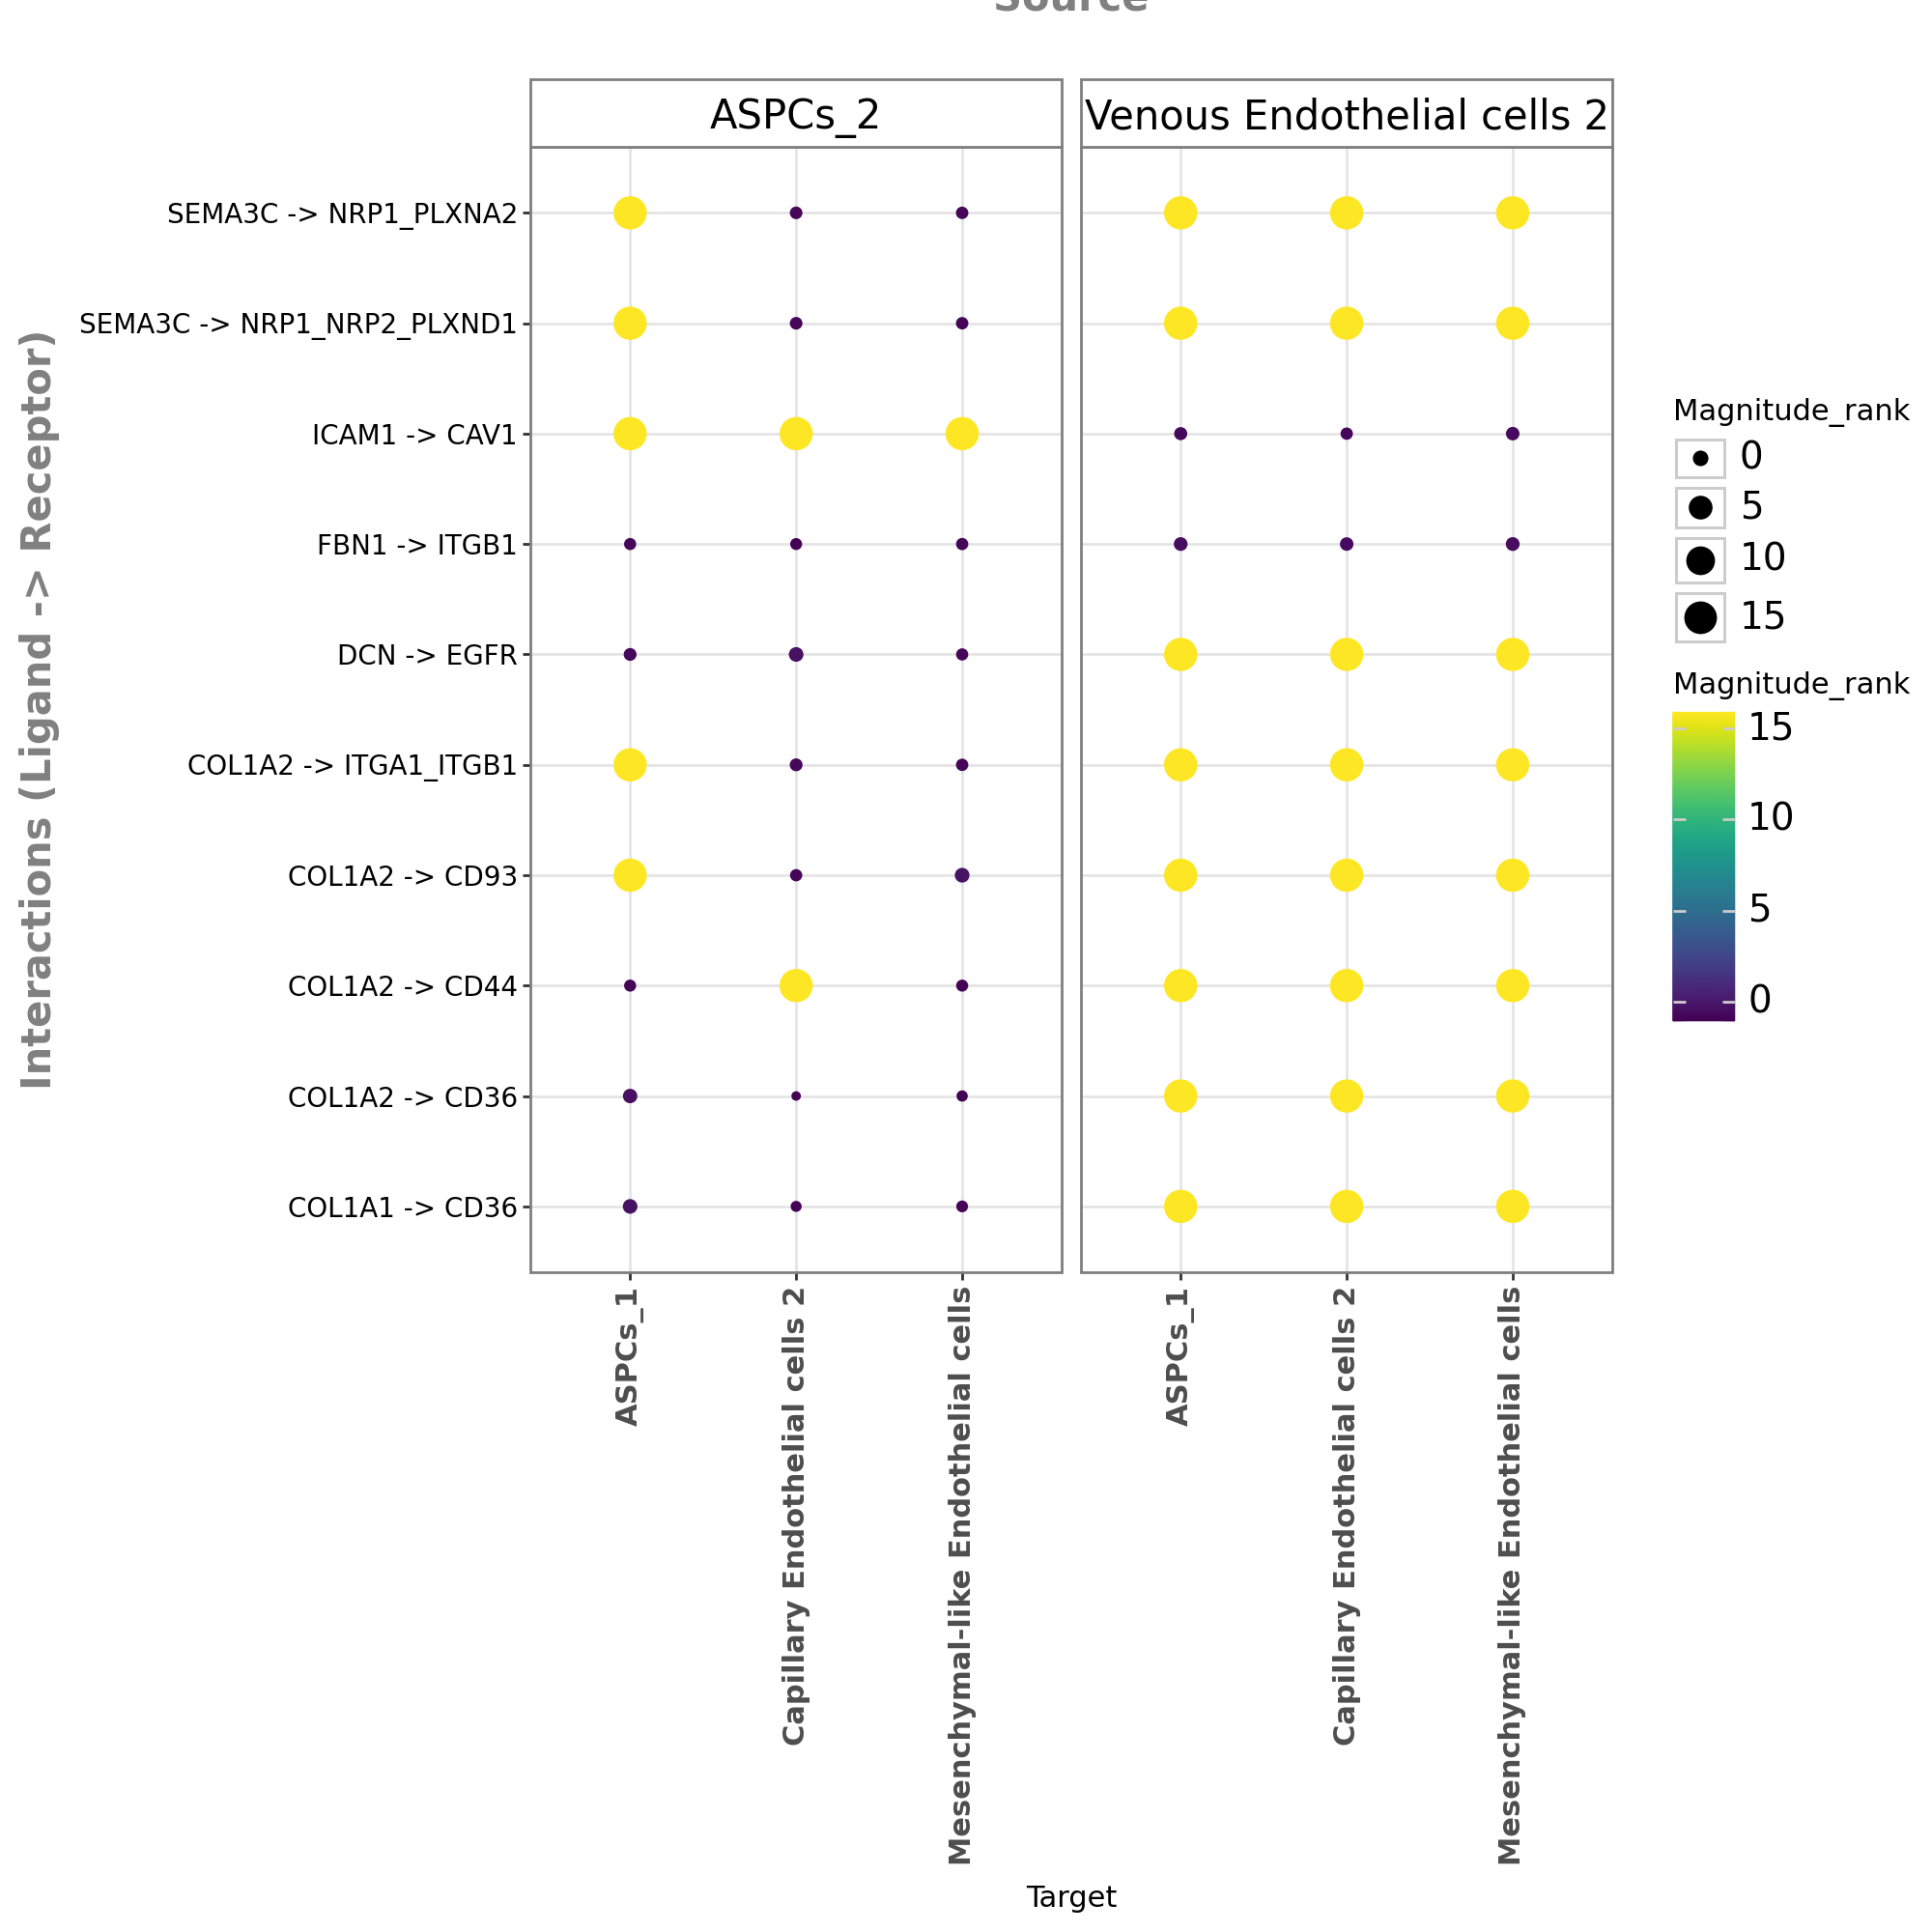

In [51]:
li.pl.dotplot(
    adata=atlas_obese,
    colour="magnitude_rank",
    # size="specificity_rank",
    size="magnitude_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    source_labels=["ASPCs_2", "Venous Endothelial cells 2"],
    target_labels=["Mesenchymal-like Endothelial cells", "Capillary Endothelial cells 2", "ASPCs_1"],
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    # filterby="specificity_rank",
    # filter_lambda=lambda x: x <= 0.05,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=10,  # and we want to keep only the top 10 interactions
    figure_size=(10, 10),
    size_range=(1, 6),
)

## Diabetic Obese

In [53]:
atlas_D_obese = atlas[atlas.obs["Condition"] == "Diabetic Obese"].copy()
atlas_D_obese

AnnData object with n_obs × n_vars = 33678 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'transferred_from_ASPCs', 'transferred_from_macroph', 't

In [55]:
sc.pp.normalize_total(atlas_D_obese, target_sum=10000)
sc.pp.log1p(atlas_D_obese)

In [56]:
cellphonedb(
    atlas_D_obese, groupby="all_sub_labels", use_raw=False, return_all_lrs=True, verbose=True
)

Using `.X`!


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


Converting mat to CSR format
13166 features of mat are empty, they will be removed.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


The following cell identities were excluded: Adipocyte_4, T/NK_7
0.09 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 33674 samples and 34206 features


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

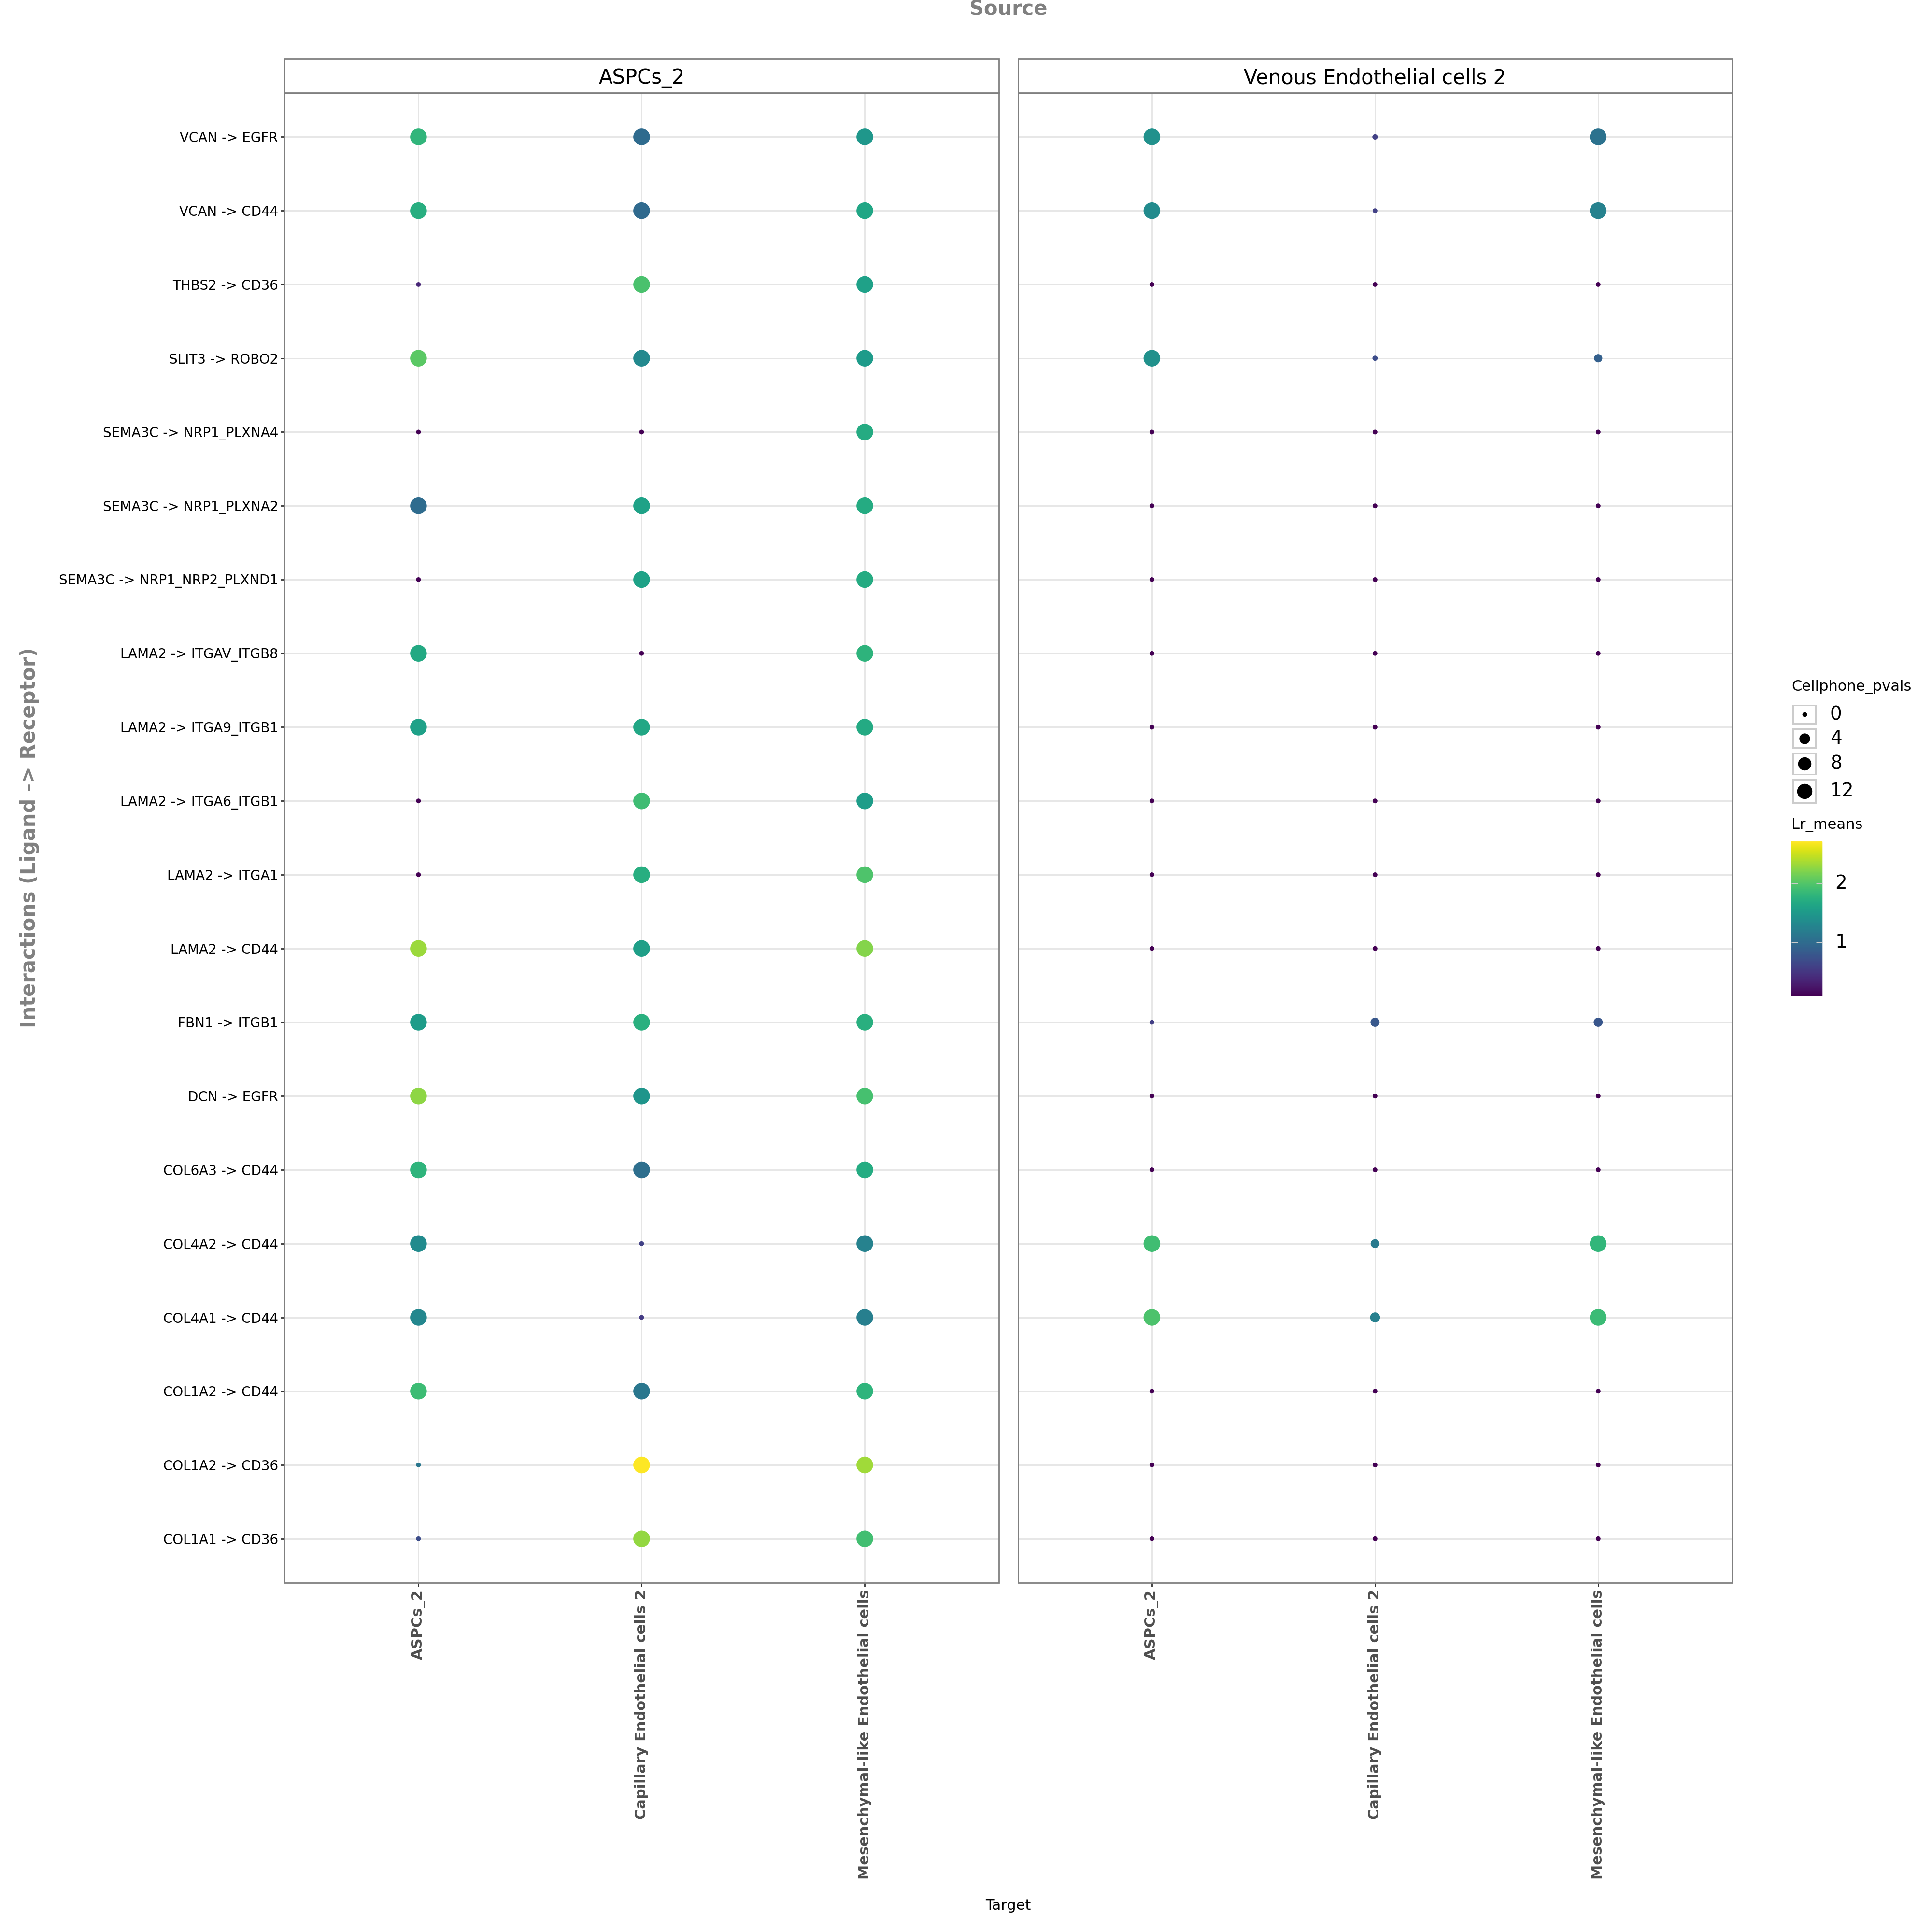

In [58]:
li.pl.dotplot(
    adata=atlas_D_obese,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["ASPCs_2", "Venous Endothelial cells 2"],
    target_labels=["Mesenchymal-like Endothelial cells", "Capillary Endothelial cells 2", "ASPCs_2"],
    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    # filterby="cellphone_pvals",
    # filter_lambda=lambda x: x <= 0.01,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(20, 20),
    size_range=(1, 6),
)

In [64]:
rank_aggregate(
    atlas_D_obese, groupby="all_sub_labels", return_all_lrs=True, use_raw=False, verbose=True
)

Using `.X`!


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


Converting mat to CSR format
13166 features of mat are empty, they will be removed.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


The following cell identities were excluded: Adipocyte_4, T/NK_7
0.09 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 33674 samples and 34206 features


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_liana_pipe.py:312: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running Connectome


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running log2FC


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running NATMI


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running SingleCellSignalR


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Running CellChat


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_reassemble_complexes.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [65]:
liana_res = atlas_D_obese.uns['liana_res'].copy()
liana_res.to_csv('atlas_D_obese_aggregate_scores.csv')
# only keep those that are not liana's ranks
liana_res.head()

source      target ligand_complex receptor_complex  lr_means  \
6618442          T/NK_1      T/NK_4            B2M            CD247  3.445161   
677609          ASPCs_4  Mast cells          LAMA2             CD44  3.334833   
6802978          T/NK_2      T/NK_4            B2M            CD247  3.434946   
6399592  Pre-adipocytes  Mast cells            VIM             CD44  3.228476   
3668211    Macro/Mono_1      T/NK_4           MRC1            PTPRC  3.226140   

         cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
6618442              0.0   9.707930       4.073386  3.940280     0.013987   
677609               0.0  10.266496       1.427926  2.208138     0.005328   
6802978              0.0   9.667578       4.066962  3.874929     0.013929   
6399592              0.0   9.753771       1.513576  2.358901     0.003735   
3668211              0.0  10.255236       1.658412  2.758218     0.007752   

          lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
6618442  0.975891  0.276146             0.0      4.782992e-08    1.316572e-17  
677609   0.976541  0.273389             0.0      6.473952e-08    2.571429e-17  
6802978  0.975842  0.267650             0.0      4.903274e-08    1.170205e-16  
6399592  0.975947  0.271249             0.0      6.473952e-08    1.499656e-16  
3668211  0.976528  0.292126             0.0      6.473952e-08    2.057141e-16

In [66]:
atlas_D_obese.uns["liana_res"].drop_duplicates(
    ["ligand_complex", "receptor_complex"]
).head()

source      target ligand_complex receptor_complex  lr_means  \
6618442          T/NK_1      T/NK_4            B2M            CD247  3.445161   
677609          ASPCs_4  Mast cells          LAMA2             CD44  3.334833   
6399592  Pre-adipocytes  Mast cells            VIM             CD44  3.228476   
3668211    Macro/Mono_1      T/NK_4           MRC1            PTPRC  3.226140   
6610063          T/NK_1      T/NK_2            B2M            KLRD1  3.365260   

         cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
6618442              0.0   9.707930       4.073386  3.940280     0.013987   
677609               0.0  10.266496       1.427926  2.208138     0.005328   
6399592              0.0   9.753771       1.513576  2.358901     0.003735   
3668211              0.0  10.255236       1.658412  2.758218     0.007752   
6610063              0.0   8.922455       2.949786  3.707195     0.014329   

          lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
6618442  0.975891  0.276146             0.0      4.782992e-08    1.316572e-17  
677609   0.976541  0.273389             0.0      6.473952e-08    2.571429e-17  
6399592  0.975947  0.271249             0.0      6.473952e-08    1.499656e-16  
3668211  0.976528  0.292126             0.0      6.473952e-08    2.057141e-16  
6610063  0.974879  0.258786             0.0      4.151778e-08    5.021362e-16

In [67]:
atlas_D_obese.write_h5ad('atlas_D_obese_Liana_plus_ran.h5ad')

In [68]:
atlas_D_obese.uns["liana_res"].sort_values("magnitude_rank").head(10)

source       target ligand_complex receptor_complex  \
6618442          T/NK_1       T/NK_4            B2M            CD247   
677609          ASPCs_4   Mast cells          LAMA2             CD44   
6802978          T/NK_2       T/NK_4            B2M            CD247   
6399592  Pre-adipocytes   Mast cells            VIM             CD44   
3668211    Macro/Mono_1       T/NK_4           MRC1            PTPRC   
6610063          T/NK_1       T/NK_2            B2M            KLRD1   
493073          ASPCs_3   Mast cells          LAMA2             CD44   
597930          ASPCs_4  Adipocyte_3          LAMA2      ITGA7_ITGB1   
6436082  Pre-adipocytes       T/NK_4         LGALS1            PTPRC   
6794599          T/NK_2       T/NK_2            B2M            KLRD1   

         lr_means  cellphone_pvals  expr_prod  scaled_weight  lr_logfc  \
6618442  3.445161              0.0   9.707930       4.073386  3.940280   
677609   3.334833              0.0  10.266496       1.427926  2.208138   
6802978  3.434946              0.0   9.667578       4.066962  3.874929   
6399592  3.228476              0.0   9.753771       1.513576  2.358901   
3668211  3.226140              0.0  10.255236       1.658412  2.758218   
6610063  3.365260              0.0   8.922455       2.949786  3.707195   
493073   3.175112              0.0   9.496520       1.333878  2.398876   
597930   3.253214              0.0   9.571212       3.009179  2.875086   
6436082  3.100466              0.0   9.542586       2.131369  2.890310   
6794599  3.355044              0.0   8.885367       2.943362  3.641844   

         spec_weight   lrscore  lr_probs  cellchat_pvals  specificity_rank  \
6618442     0.013987  0.975891  0.276146             0.0      4.782992e-08   
677609      0.005328  0.976541  0.273389             0.0      6.473952e-08   
6802978     0.013929  0.975842  0.267650             0.0      4.903274e-08   
6399592     0.003735  0.975947  0.271249             0.0      6.473952e-08   
3668211     0.007752  0.976528  0.292126             0.0      6.473952e-08   
6610063     0.014329  0.974879  0.258786             0.0      4.151778e-08   
493073      0.004929  0.975631  0.257626             0.0      6.473952e-08   
597930      0.020416  0.975724  0.256372             0.0      4.763444e-09   
6436082     0.010540  0.975688  0.308170             0.0      6.473952e-08   
6794599     0.014270  0.974828  0.250639             0.0      4.242373e-08   

         magnitude_rank  
6618442    1.316572e-17  
677609     2.571429e-17  
6802978    1.170205e-16  
6399592    1.499656e-16  
3668211    2.057141e-16  
6610063    5.021362e-16  
493073     6.271559e-16  
597930     7.713741e-16  
6436082    1.010672e-15  
6794599    1.332934e-15

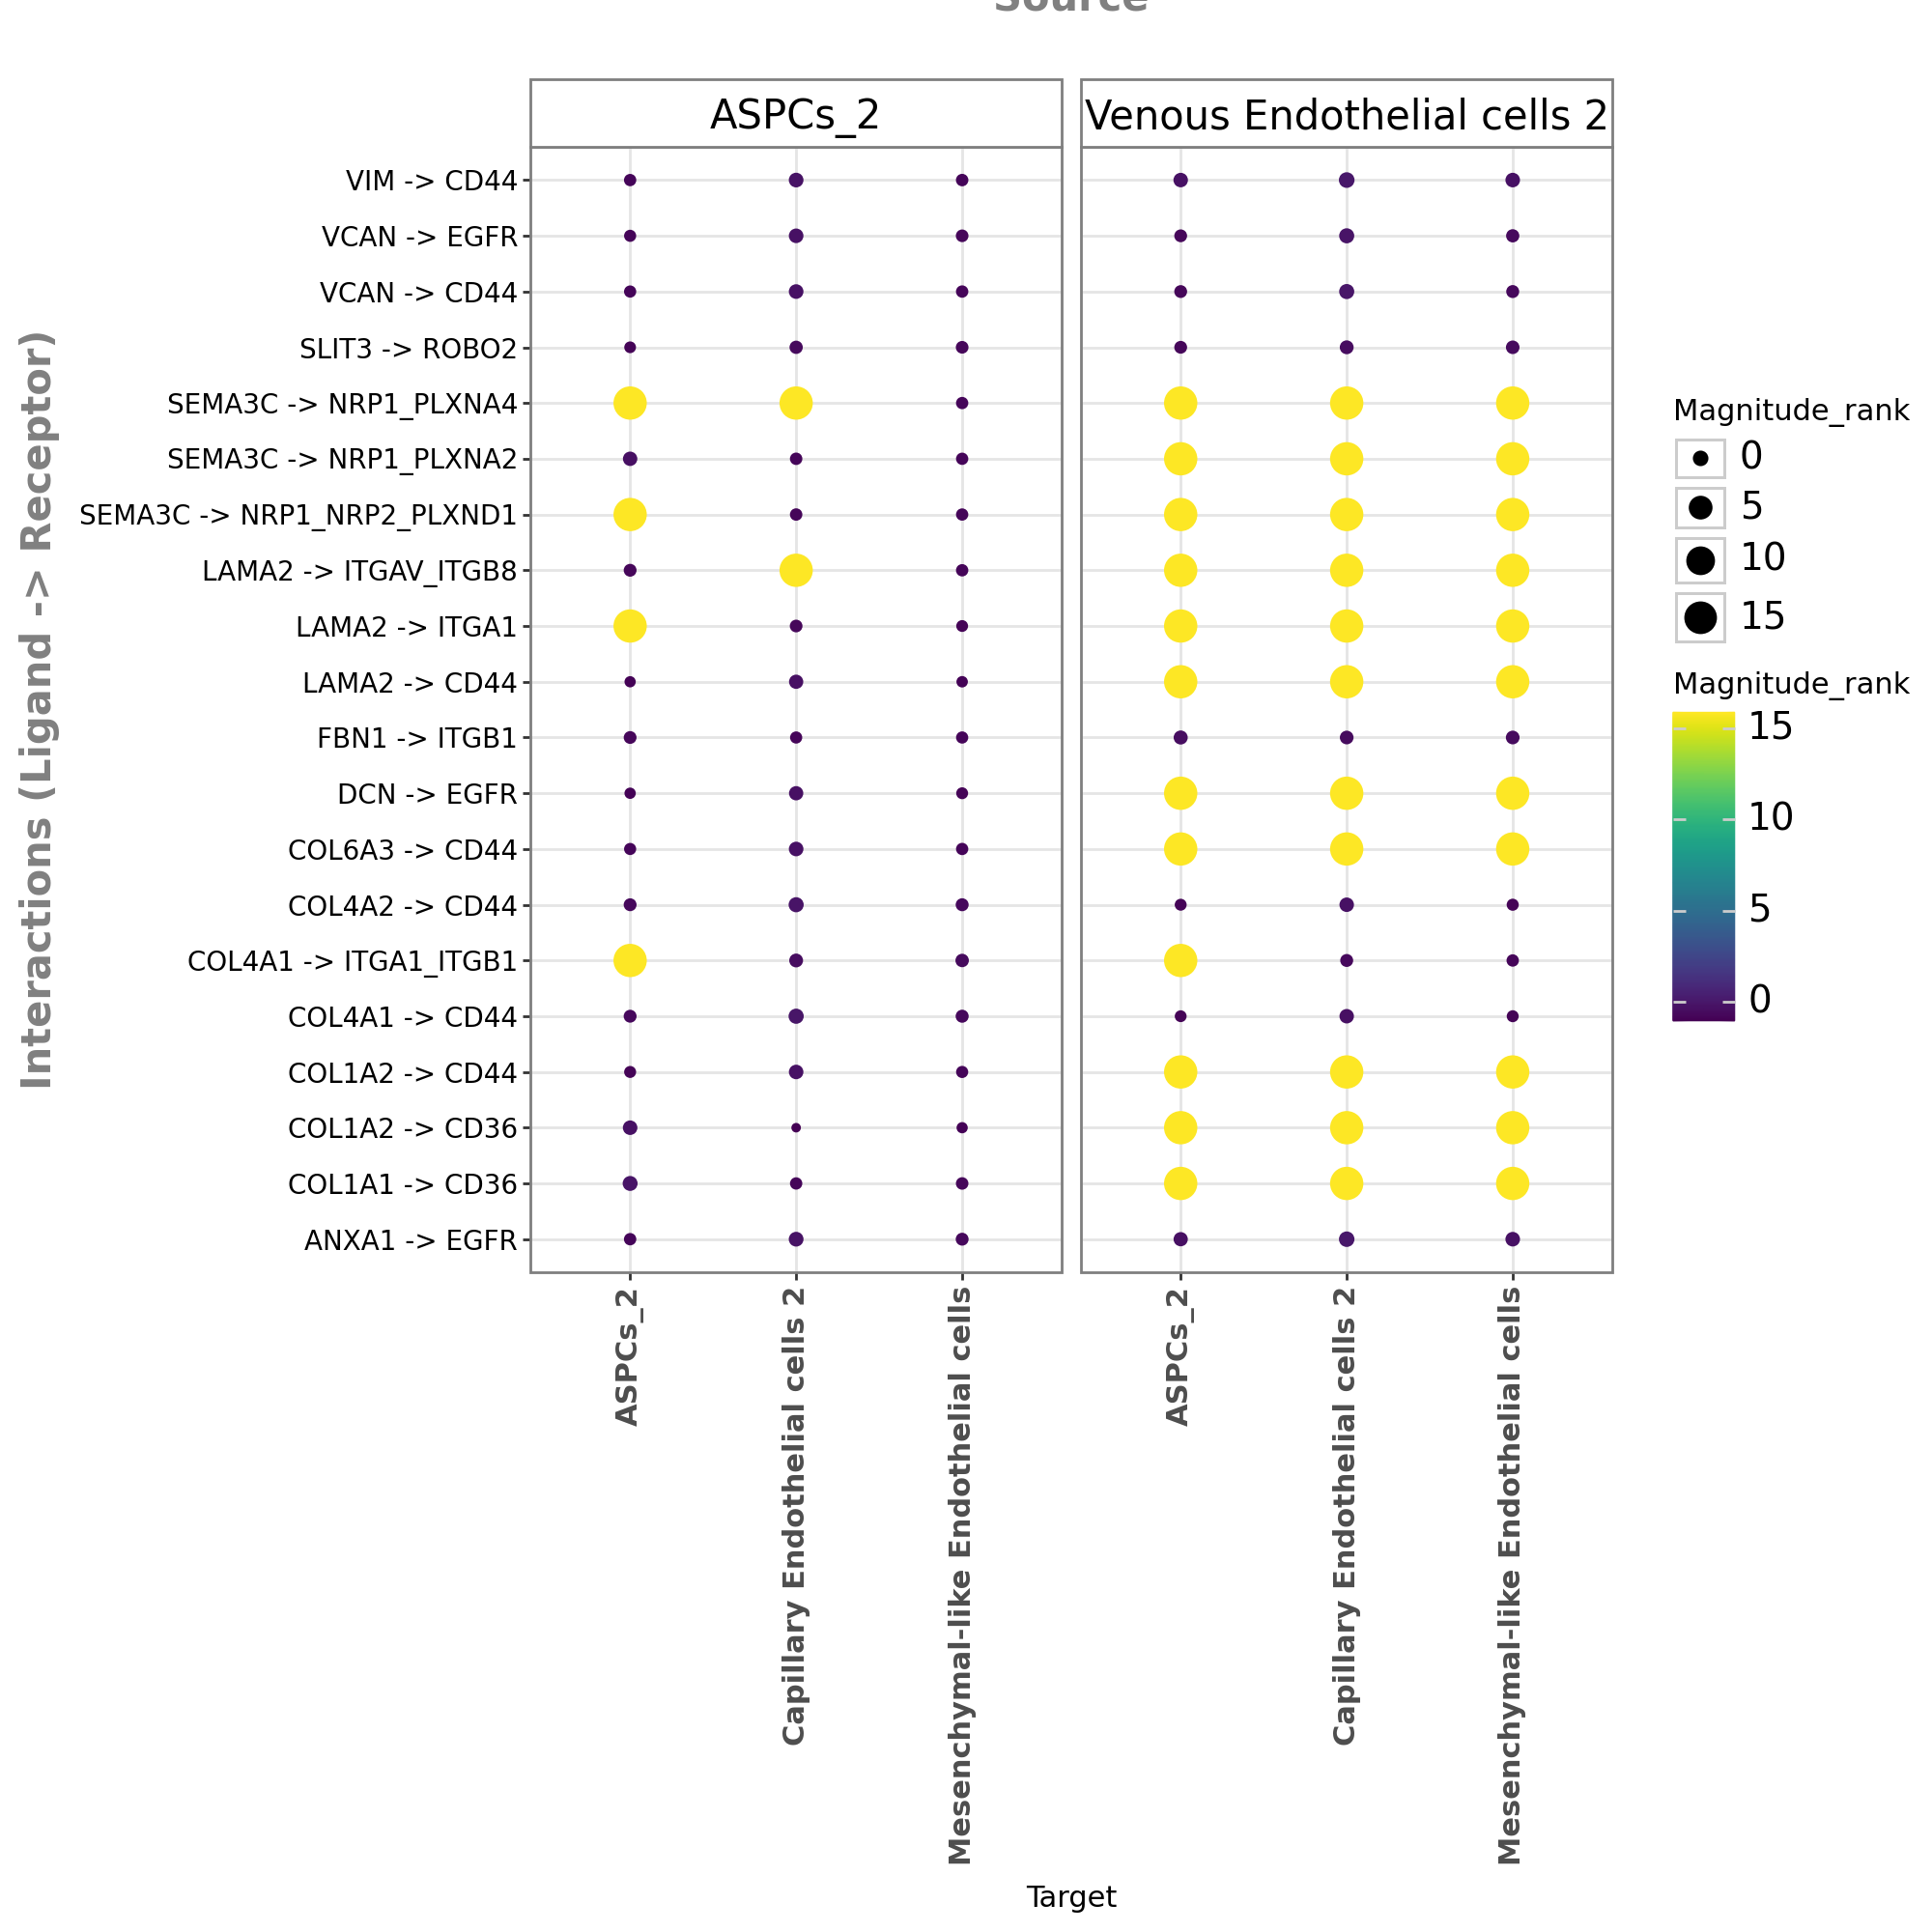

In [69]:
li.pl.dotplot(
    adata=atlas_D_obese,
    colour="magnitude_rank",
    # size="specificity_rank",
    size="magnitude_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    source_labels=["ASPCs_2", "Venous Endothelial cells 2"],
    target_labels=["Mesenchymal-like Endothelial cells", "Capillary Endothelial cells 2", "ASPCs_2"],# since the rank_aggregate can also be interpreted as a probability distribution
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    # filterby="specificity_rank",
    # filter_lambda=lambda x: x <= 0.05,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(10, 10),
    size_range=(1, 6),
)

## By sample (Condition in our case)

In [70]:
li.mt.rank_aggregate.by_sample(
    atlas,
    groupby='all_sub_labels',
    resource_name='consensus', # NOTE: uses human gene symbols!
    sample_key='Condition', # sample key by which we which to loop
    use_raw=False,
    verbose=True, # use 'full' to show all verbose information
    n_perms=None, # exclude permutations for speed
    return_all_lrs=True, # return all LR values
    )

Now running: Lean:   0%|                                  | 0/3 [00:00<?, ?it/s]/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_liana_pipe.py:312: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
/home/m

In [75]:
atlas.uns['liana_res'].head()

Condition                           source         target ligand_complex  \
0      Lean       Venous Endothelial cells 3  Macro/Mono_10            APP   
1      Lean                    Macro/Mono_10  Macro/Mono_10            MIF   
2      Lean  Lymphoid-like Endothelial cells  Macro/Mono_10            APP   
3      Lean       Venous Endothelial cells 3  Macro/Mono_10            MIF   
4      Lean    Capillary Endothelial cells 2  Macro/Mono_10            APP   

  receptor_complex   lr_means   expr_prod  scaled_weight  lr_logfc  \
0             CD74  68.632393  760.327209       5.929013       NaN   
1       CD74_CXCR4  67.387177  432.879578       5.374641       NaN   
2             CD74  67.132011  365.781586       5.101887       NaN   
3       CD74_CXCR4  66.891182  302.450775       5.059045       NaN   
4             CD74  66.901268  305.102539       4.974674       NaN   

   spec_weight   lrscore  lr_probs  magnitude_rank  
0     0.045264  0.997492  0.000106    5.802119e-18  
1     0.032699  0.996679  0.000050    1.469519e-15  
2     0.021776  0.996389  0.000037    9.412608e-15  
3     0.022847  0.996030  0.000037    2.266861e-14  
4     0.018163  0.996047  0.000031    3.729681e-14

/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 11 x 8 in image.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: Dotplot-by-condition.pdf


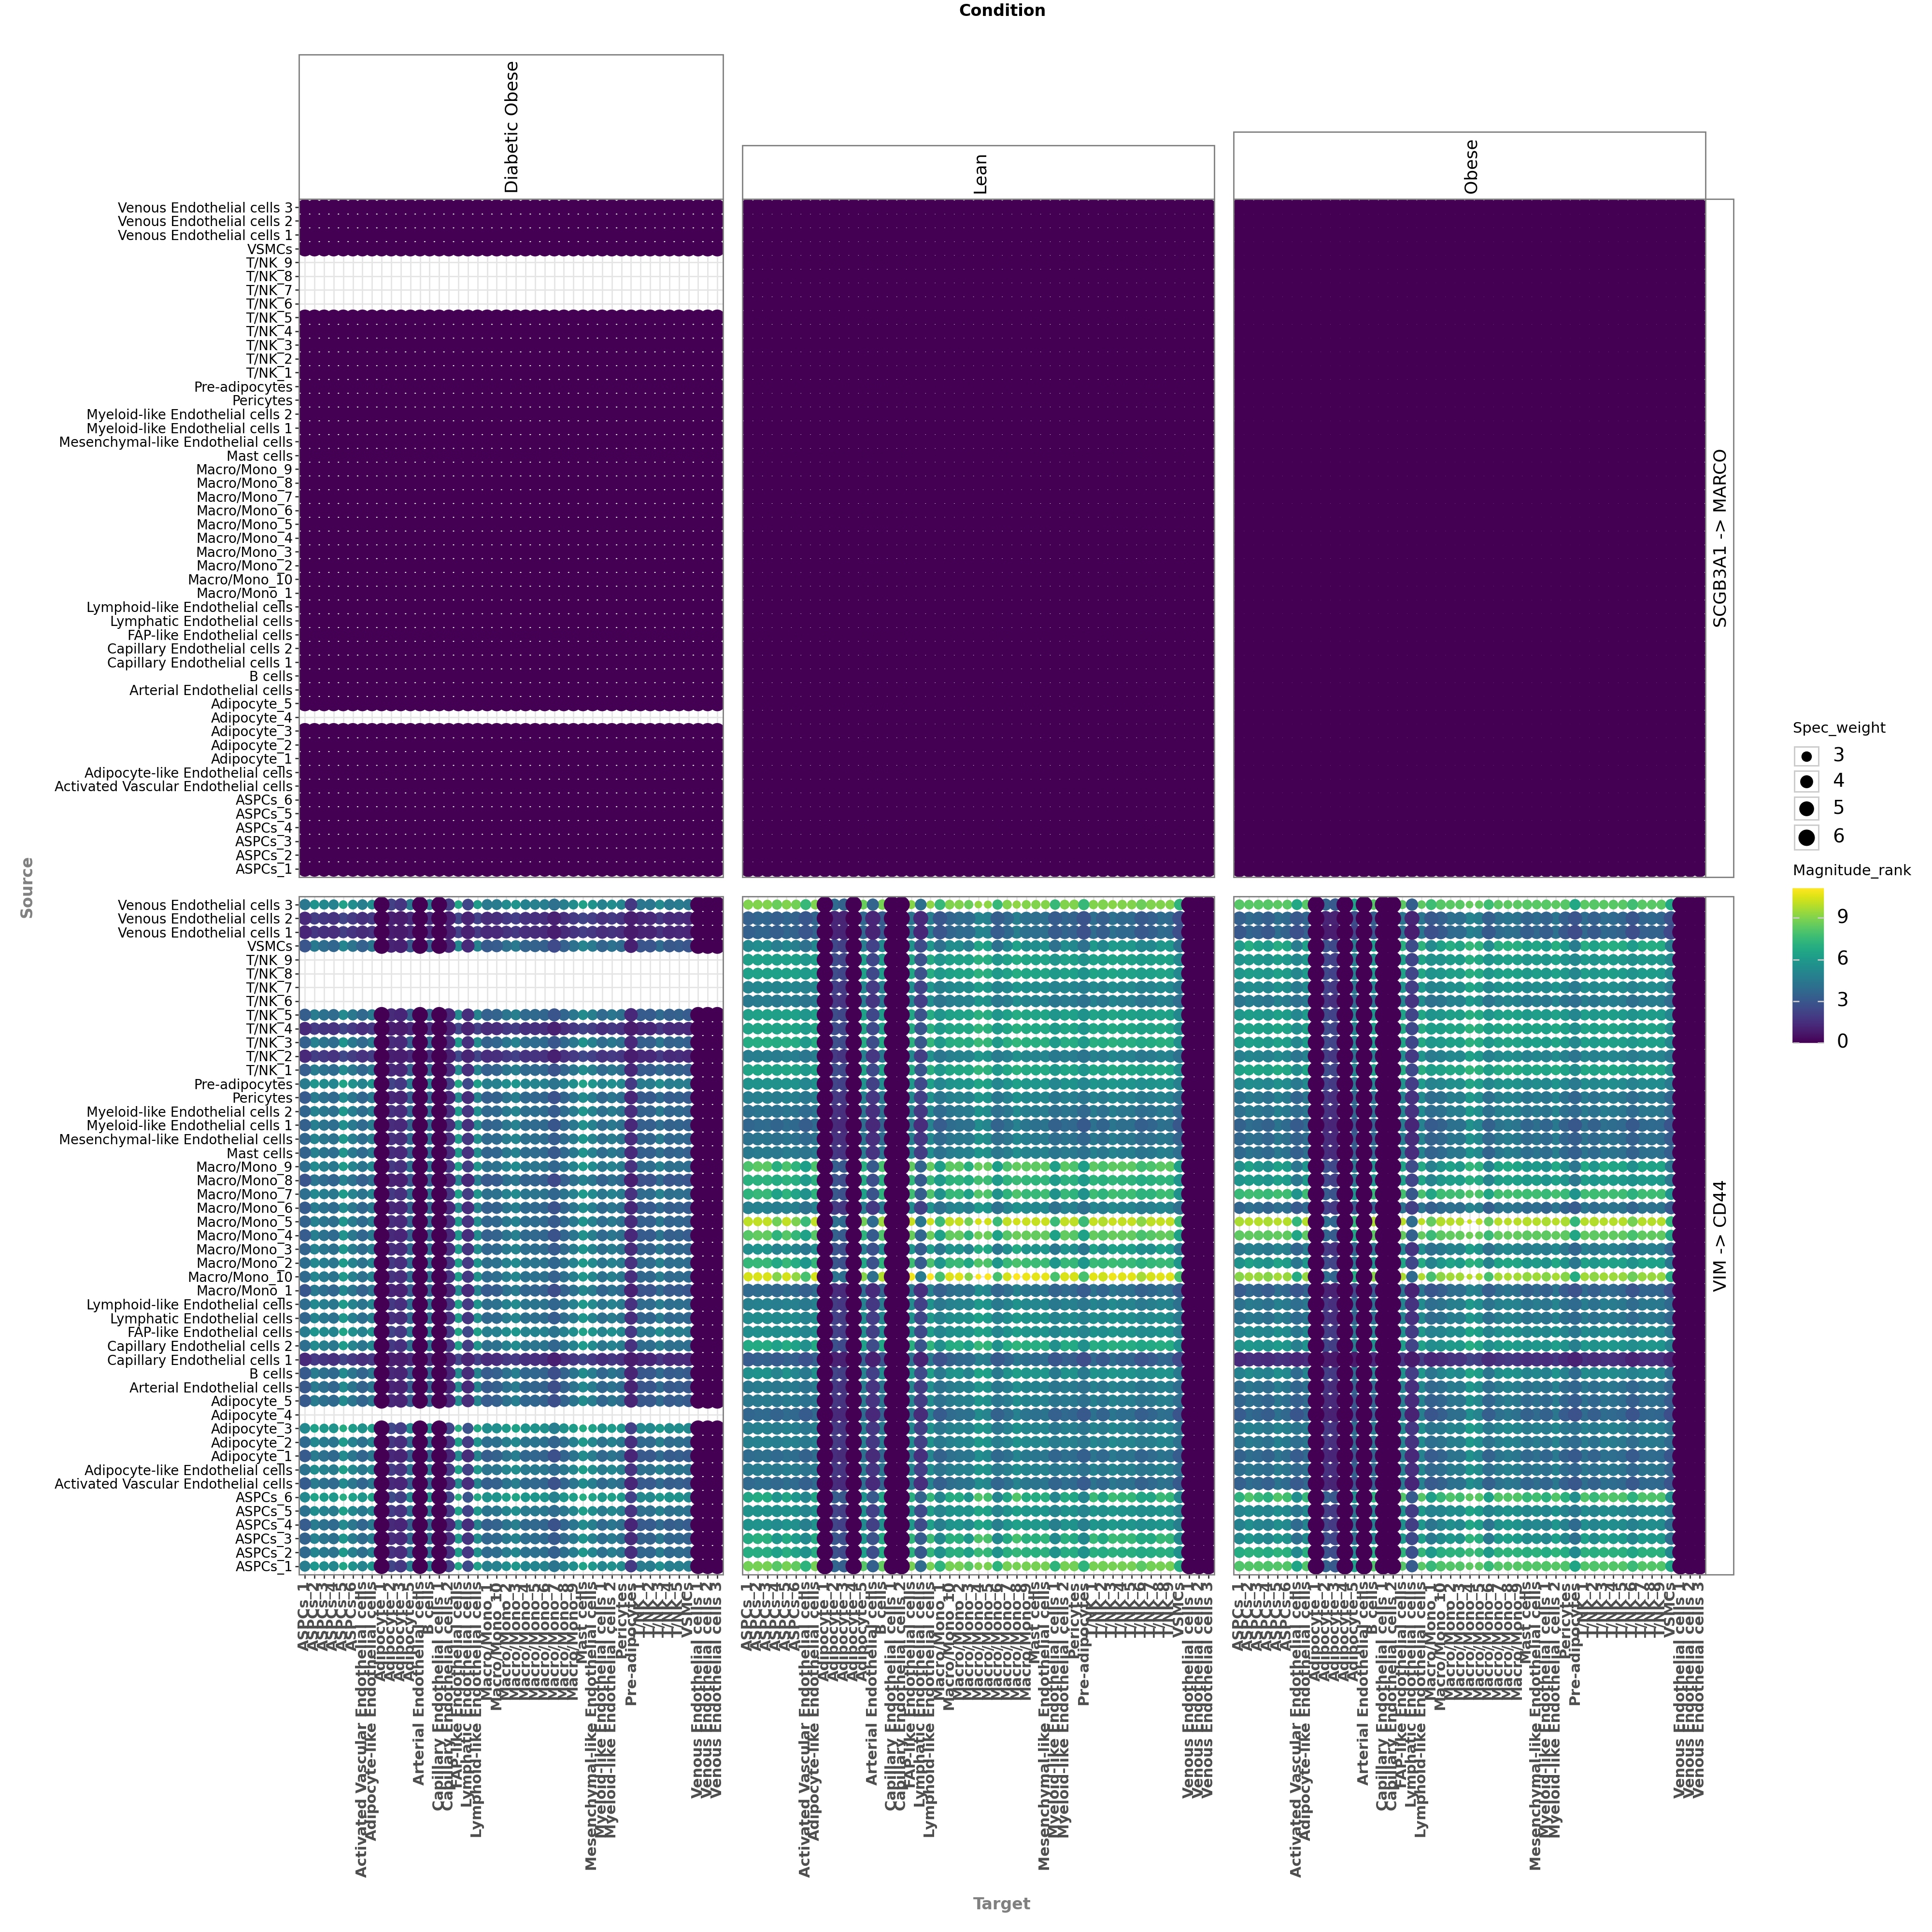

In [79]:
plot = (li.pl.dotplot_by_sample(adata=atlas,
                               colour='magnitude_rank', size = 'spec_weight',
                               # size='specificity_rank',
                               # source_labels=["B", "pDC", "Epithelial"],
                               # target_labels=["Macrophages", "Mast", "pDC", "NK"],
                               ligand_complex = ['VIM', 'SCGB3A1'],
                               receptor_complex= ['CD44', 'MARCO'],
                               sample_key='Condition',
                               inverse_colour=True,
                               inverse_size=True,
                               figure_size=(20, 20),
                               size_range=(1, 6),
                               ))

plot.save('Dotplot-by-condition.pdf', height=8, width=11)
plot

In [80]:
li.mt.rank_aggregate.by_sample(atlas,
                               sample_key='Condition',
                               groupby='all_sub_labels',
                               resource_name = 'consensus',
                               expr_prop=0.1, # must be expressed in expr_prop fraction of cells
                               min_cells = 5,
                               n_perms = 100,
                               use_raw = False, # run on log- and library-normalized counts
                               verbose = True,
                               inplace = True
                              )

Now running: Lean:   0%|                                  | 0/3 [00:00<?, ?it/s]/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/mhassan/miniconda3/envs/liana/lib/python3.12/site-packages/liana/method/_liana_pipe.py:312: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
/home/m

KeyError: 'cellphone_pvals'